# Credit Card Services: Strategies for retention of customers

## Introduction
<p> Credit Card fees have been a considerable source of revenue for Thera Bank. The bank
recently saw a steep decline in existing customers using their credit cards. This will lead to loss of revenue for the bank. The current aim is to improve the credit card services so that customer retention stabilizes or has growth.</p>
<p> Background: Banks charge credit card fees based on circumstances, or regardless of usage scenarios. These fees may be of types annual fees, balance transfer fees, late fees, foreign transaction fees and so on and provide an appreciable source of revenue for banks.</p>

### Objective
<ol>
    <li>Identifying which customers are likely to continue using credit cards with the bank. </li>
    <li> Developing strategies to improve the credit card services that will help retention of existing customers.</li>
    <li>Generating insights and recommendations for the bank for credit card products.</li>

### Data Information/Variables
<p> <strong>Clientnum</strong> - unique number for customer holding account<br>
    <strong>Attrition_Flag</strong> - has value closed/attrited customer else existing customer<br>
    <strong>Customer_Age</strong> - age of customer in years<br>
    <strong>Gender</strong> - gender of account holder<br>
    <strong>Dependent_Count</strong> - Number of dependents<br>
    <strong>Education_Level</strong> - has values Graduate, High School, Unknown<br>
    <strong>Marital_Status</strong> - marital status of account holder<br>
    <strong>Income_Category</strong> - annual income category of account holder<br>
    <strong>Card_Category</strong> - type of credit card the account holder has<br>
    <strong>Months_on_book</strong> - period of relationship with the bank<br>
    <strong>Total_Relationship_Count</strong> - no. of products held by customer<br>
    <strong>Month_Inactive_12_mon</strong> - no. of months inactive in the last year<br>
    <strong>Contacts_Count_12_mon</strong> - no. of contacts between customer and bank in 
    12 months<br>
    <strong>Credit_Limit</strong> - credit limit on the credit card<br>
    <strong>Total_Revolving_Bal</strong> - balance that carries from one month to next<br>
    <strong>Avg_Open_To_Buy</strong> - refers to amount left on credit card to use (average of last 12 months)<br>
    <strong>Total_Trans_Amt</strong> - total transaction amount in last 12 months<br>
    <strong>Total_Trans_Ct</strong> - total transactions (count) in last 12 months<br>
    <strong>Total_Ct_Chng_Q4_Q1</strong> - ratio of total transaction count in 4th quarter and the total transaction count in 1st quarter<br>
    <strong>Total_Amt_Chng_Q4_Q1</strong> - ratio of total transaction amount in 4th quarter and total transaction amount in 1st quarter <br>
    <strong>Avg_Utilization_Ratio</strong> - represents how much of the available credit the customer spent<br>
     </p>

### The analysis below has the following sections:
<ol>
    <li> Loading and importing packages </li>
    <li> Removing warnings from python notebooks </li>
    <li> Loading the dataset </li>
    <li> Preview of the dataset </li>
    <li> Descriptive statistics for the dataset </li>
    <li> Exploratory Data Analysis - univariate, bivariate and multivariate analysis </li>
    <li> Data preprocessing/model preparation - feature engineering, preparation of data for modeling, missing value   treatment, outlier treatment </li>
    <li> <strong>Logistic Regression models</strong> - Logistic regression, logistic regression with oversampling, logistic regression with undersampling <br>
     <strong>Decision Tree models </strong> - Decision Tree classifier, decision tree with oversampling, decision tree with undersampling <br>
     <strong>Bagging models </strong> - bagging classifier, bagging with oversampling, bagging with undersampling <br>
      <strong>Random forest models </strong> - random forest classifier, random forest with oversampling, random forest with undersampling <br>
    <strong>Adaboost models </strong> - adaboost classifier, adaboost with oversampling, adaboost with undersampling <br>
     <strong>Gradient descent models </strong> - gradient descent classifier, gradient descent with oversampling, gradient descent with undersampling </li>
    <li> Hypertuning the best 3 models from above analysis </li>
    <li> Hypertuning with randomized search for best 3 models from above analysis </li>
    <li> Building pipeline with the best model </li>
    <li> Insights and recommendations for the marketing department </li>

## 1. Loading and importing packages

In [1]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(color_codes=True)  # For background of the graphs
%matplotlib inline

# For previewing the data, the columns can be set to limit of None and 100 for the rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# To be used for data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Below is for splitting the observations for train/test
from sklearn.model_selection import train_test_split

# For missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Necessary imports to execute classification models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Necessary imports for oversampling and undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Necessary imports for tuning the models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# For pipeline creation 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Necessary imports for performance metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# For automatic structuring/beautification of the python notebook
#%load_ext nb_black

### 2. Removing warnings from python notebook

In [2]:
# Removing warnings from the notebook
import warnings

warnings.filterwarnings("ignore")

### 3. Loading the dataset

In [3]:
# The dataset is stored in a csv file and we want to read it into a pandas dataframe
 
customerData = pd.read_csv("BankChurners.csv", index_col=0)
# We are using index_col = 0, otherwise the dataframe had the first column as an index, and then"CLIENTNUM" as an index again.
# Using index_col = 0 will make the dataframe have "CLIENTNUM" as the first column.
print(
    f"The dataframe has {customerData.shape[0]} rows and {customerData.shape[1]} columns."
)
# Using f-string to print the statement for performance reasons

The dataframe has 10127 rows and 20 columns.


### 4. Previewing the dataset

In [4]:
# Preview of 10 random rows of the dataset
# To see random 10 rows, numpy's random seed was used.
# Putting random.seed to be 1 will return the same random 10 rows everytime we execute the code.
np.random.seed(1)
customerData.sample(n=10)
# The Reason we want to return random rows is so that we can see  the typical values from a random sample.

Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                            
712389108  Existing Customer            43      F                2   
718388733  Existing Customer            38      F                1   
710109633  Existing Customer            39      M                2   
717331758  Existing Customer            44      M                4   
709460883  Attrited Customer            38      F                2   
789105183  Existing Customer            54      M                3   
771342183  Attrited Customer            53      F                3   
708174708  Existing Customer            38      M                4   
718076733  Existing Customer            43      M                1   
821889858  Attrited Customer            50      F                1   

          Education_Level Marital_Status Income_Category Card_Category  \
CLIENTNUM                                                                
712389108        Graduate        Married  Less than $40K          Blue   
718388733         College            NaN  Less than $40K          Blue   
710109633         College        Married     $60K - $80K          Blue   
717331758        Graduate        Married         $120K +          Blue   
709460883       Doctorate        Married  Less than $40K          Blue   
789105183   Post-Graduate         Single    $80K - $120K        Silver   
771342183        Graduate         Single     $40K - $60K          Blue   
708174708        Graduate        Married     $40K - $60K          Blue   
718076733        Graduate         Single     $60K - $80K        Silver   
821889858       Doctorate         Single             abc          Blue   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
712389108              36                         6                       3   
718388733              32                         2                       3   
710109633              31                         6                       3   
717331758              32                         6                       3   
709460883              28                         5                       2   
789105183              42                         3                       1   
771342183              40                         6                       3   
708174708              27                         6                       2   
718076733              31                         4                       3   
821889858              46                         6                       4   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
712389108                      2        2570.0                 2107   
718388733                      3        2609.0                 1259   
710109633                      2        9871.0                 1061   
717331758                      4       34516.0                 2517   
709460883                      4        1614.0                    0   
789105183                      2       34516.0                 2488   
771342183                      2        1625.0                    0   
708174708                      4        5535.0                 1276   
718076733                      3       25824.0                 1170   
821889858                      3        1970.0                 1477   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
CLIENTNUM                                                           
712389108            463.0                 0.651             4058   
718388733           1350.0                 0.871             8677   
710109633           8810.0                 0.545             1683   
717331758          31999.0                 0.765             4228   
709460883           1614.0                 0.609             2437   

#### Observation
<p> The data has 10,127 rows and 20 columns. At first glance, we see that majority of the columns are continous variables. Some columns have "NaN"s. </p>
<p>The random rows shows presence of "NaN" as seen above for Marital_Status column. Also Income_Category has "abc" values which do not fit with the other values for the column. The target variable for this analysis will be "Attrition Customer" which has values "Existing Customer" and "Attrited Customer". We can also observe that "CLIENTNUM" column are basically account numbers for the customers and will not have any useful information for building the models. We will drop the "CLIENTNUM" column in the data pre-processing section. </p>

In [5]:
# To see data types and non-null counts for all the columns
customerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

#### Observation
<p> From above, we observe that there are only 2 columns that have missing values - "Education_Level" and "Marital_Status". The target variable "Attrition_Flag" has no missing values. Multiple columns are of the type float, int or object. 2 columns will require missing value treatment which will be tackled in the data preprocessing section. </p>

In [6]:
# Finding the sum total of missing values in each of the columns
customerData.isnull().sum().sort_values(ascending=False)

Education_Level             1519
Marital_Status               749
Attrition_Flag                 0
Contacts_Count_12_mon          0
Total_Ct_Chng_Q4_Q1            0
Total_Trans_Ct                 0
Total_Trans_Amt                0
Total_Amt_Chng_Q4_Q1           0
Avg_Open_To_Buy                0
Total_Revolving_Bal            0
Credit_Limit                   0
Months_Inactive_12_mon         0
Customer_Age                   0
Total_Relationship_Count       0
Months_on_book                 0
Card_Category                  0
Income_Category                0
Dependent_count                0
Gender                         0
Avg_Utilization_Ratio          0
dtype: int64

#### Observation
<p> The column "Education_Level" has maximum number of missing values - 1519 rows. Marital_Status has 749 missing values. We may be able to use the Customer_Age groups and Income_category groups to fill in the missing values for Education_level (using median for those groups). For Marital_Status missing values, it may be possible to group by age and then take the mode value (since it is categorical variable) and use that to impute the missing values for Marital_Status column. </p>

### 5. Descriptive statistics for the dataset

In [7]:
# Before starting preprocessing, a look at summary statistics
customerData.describe().T  # taking transpose since it is easier to view

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

#### Observations 
<ol>
    <li> The mean customer age is around 46 years old, and 75% of the customers are less than 52 years old. The mean and median for Customer_Age is the same, so Customer_Age is going to be a mostly symmetric distribution.</li>
    <li> The customers have 2 dependents on an average. Since the mean Dependent_count is almost same as the median Depedent_count, the distribution for Dependent_Count is also going to be mostly symmetric. </li>
    <li> The Months_on_book indicates the period of relationship with the bank. The mean is 35.9 months, while the median is 36 months. 75% of the customers have less than 40 months period of relationship with the bank - which is less than 2 years. </li>
    <li> The Total_Relationship_Count, which is the number of bank products the customer has, on average 3.8 products. The median is 4 products, so this column's distribution is mostly symmetric as well. 75% of the customers have about 5 bank products. </li>
    <li> Customers have been inactive on an average of 2.34 months (median 2 months ) last year. 75% of the customers were inactive 3 months last year. </li>
    <li> The number of counts the customer had contact with the bank is on average of 2.4 times in the past 12 months. The median is 2 times in the past year. </li>
    <li> The Credit_Limit for 10,127 customers was a mean of 8631 dollars. The median credit limit, however, was 4549 dollars indicating a skewed distribution.75% of the customers had a Credit_Limit of 11,057 dollars. The column is being interpreted as dollars instead of thousands of dollars since it is Credit_Limit. </li>
    <li> The mean Total_Revolving_Bal was 1162.81 dollars and the median balance was 1276 dollars. The minimum balance was 0$ and maximum was 2517 dollars. </li>
    <li> The average amount of money left in the credit card over the last 12 months (Avg_Open_To_Buy) was 7469 dollars and the mean was 3474 dollars.The minimum was 3 dollars and the maximum was 34516 dollars. The differences between median and mean indicate that this will be a skewed distribution. </li>
    <li> The Total_Amt_Chng_Q4_Q1 is the ratio of total transaction amount in 4th quarter and total transaction amount in 1st quarter. The mean was 0.75 and the mean was 0.73. </li>
    <li> The Total_Ct_Chng_Q4_Q1 is ratio of total transaction count in 4th quarter and the total transaction count in 1st quarter. The mean was 0.71 and the median was 0.702. </li>
    <li> The Total_Trans_Amt had a mean of 4404.08 and 3899 - this is the total transaction amount in the last 12 months. The minimum was 510 and the maximum was 18,484 which is a large range - however, 75 percent of the customers had 4741 as their total transaction amount in the last 12 months. </li>
    <li> The Total_Trans_Ct had a mean of 64 and a median of 67. The minimum number of transactions in the last 12 months was 10 and maximum was 139. </li>
    <li> The Avg_Utilization_Ratio which is how much of the available credit was spent by the customer - the mean was 0.27 and median was 0.176. </li>

In [8]:
customerData.describe(include=["object"]).T # To see summary statistics on categorical variables

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

#### Observations
<li> The target/dependent variable "Attrition_Flag" has only 2 unique values with the top frequency value being "Existing Customer". Since the total number of count is 10,127 this indicates 83.9% of the customers have "Existing Customer" flag. This implies an imbalanced dataset. </li>
<li> Gender only has 2 unique values with 5358 (52.9%) of them are "F" - which will stand for female gender. </li>
<li> Education_Level has 1519 missing values, as described earlier. There are 6 types of unique values. The top frequency value is graduate which is 30 percent of the customer base. </li>
<li> Marital_status has 3 unique values - this column will be further explored in depth to see if any of the groups can be clubbed together. </li>
<li> The Income_Category has 6 unique values as well, with 35% of the customers having an income less than 40K per annum. </li>
<li> Card_Category is the type of credit card product that the customer has. There are 4 unique values, and 93.1% of the customers have credit card of the type "Blue". </li>

In [9]:
# Descriptive statistics on categorical variables
# Let us take a look at how many of the current customers continued to stay with the bank. 
customersExistingCount = pd.crosstab(index=customerData["Attrition_Flag"], columns="count")
customersExistingCount
customersExistingYes = (customersExistingCount.iloc[1] / (customerData.shape[0])) * 100
customersExistingYes
print(f"The percentage of customers who remained with the bank is {float(customersExistingYes)}.")

The percentage of customers who remained with the bank is 83.934037720944.


#### Observations
<p> The percentage of customers who remained at the bank is 83.9% indicating that approximately 16% of customers left the bank. </p>

In [10]:
# To see the unique value in the columns that have 2 unique values
two_value_cols = ["Attrition_Flag", "Gender"]
for column in two_value_cols:
    print(customerData[column].value_counts())
    print("*" * 25)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
*************************
F    5358
M    4769
Name: Gender, dtype: int64
*************************


#### Observations
<p> For 'Attrition_Flag' we can see that majority of the customers (~83%) are existing customers. However, we want to improve the Existing Customer rate for the bank. </p>
<p> 52 percent of the customers are female, while 48 percent are male. This is more of less an even distribution</p>

In [11]:
# To see the unique value in the columns that have 3 unique values
three_value_cols = ["Marital_Status"]
for column in three_value_cols:
    print(customerData[column].value_counts())
    print("*" * 25)

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
*************************


#### Observations
<p> There are 3 categories for 'Marital_Status' - married customers formed the largest group (46.2%) while single customers were the next biggest group. </p>

In [12]:
# To see the unique value in the columns that have 4 unique values
four_value_cols = ["Card_Category"]
for column in four_value_cols:
    print(customerData[column].value_counts())
    print("*" * 25)

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
*************************


#### Observations
<p> The bank offered 4 types of cards - 'Blue' had the largest group of customers (93.1%) followed by 'Silver', 'Gold'. Very few customers (20 customers) had 'Platinum'.</p>

In [13]:
# To see the unique value in the columns that have 6 unique values
six_value_cols = ["Education_Level","Income_Category"]
for column in six_value_cols:
    print(customerData[column].value_counts())
    print("*" * 25)

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
*************************
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
*************************


#### Observations
<p> 30% of the customers are graduates. The next highest group are high school which are 19.8%. The doctorate group is the smallest group in the customer base.</p>
<p> For income category, the largest group of customers earn less than 40K per annum. The lowest group is 120K+ per annum. There is also a category called "abc" which will have to be treated in data preprocessing section, as it looks to be a data collection error. In the event where it is possible to talk to the data collection team, the exact category description for "abc" can be ascertained. However, here since we have no contact with a data collection group, we will have to treat "abc" category. </p>

### 6. Exploratory Data Analysis - univariate, bivariate and multivariate analysis

In [14]:
# Copy the dataframe
customerData1 = customerData.copy()

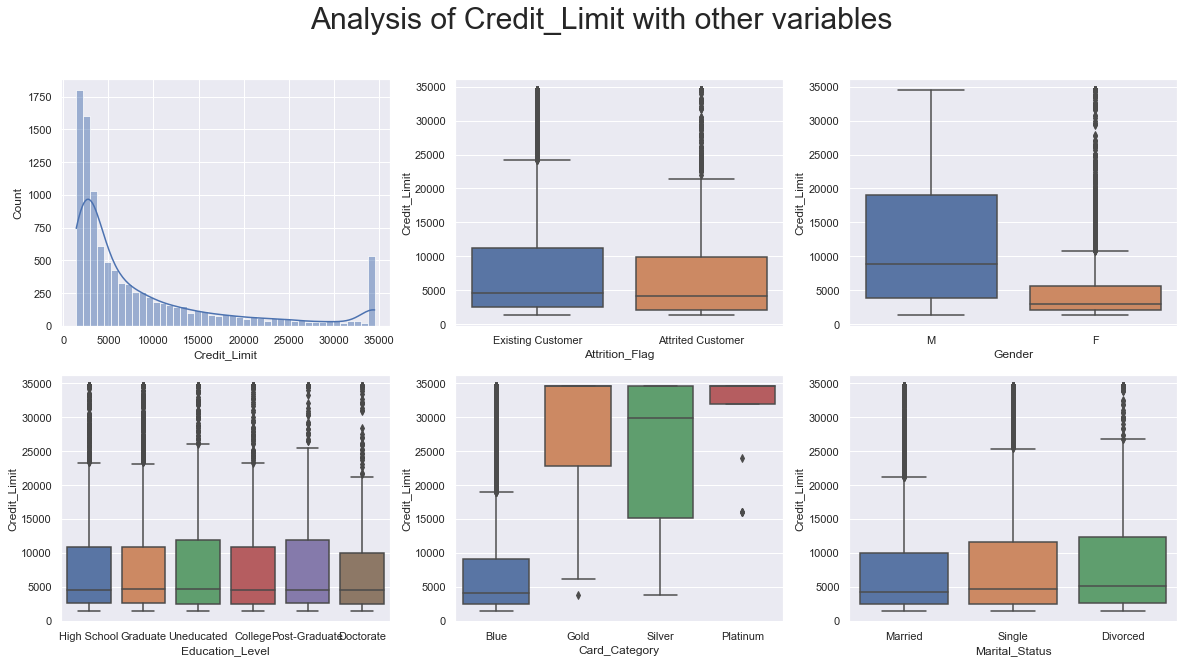

In [15]:
# Univariate and bivariate analysis
# We can start with analysis of 'Credit_Limit' - histogram and box plots of 'Credit_Limit'
# versus 'Attrition_Flag','Gender','Education_Level', 'Income_Category', "Card_Category", "Marital_Status"
#'Credit_Limit' here is the continous variable

# Display histogram and boxplots for Credit_Limit analysis
# Make a grid of 2 rows and 4 columns
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# Put a figure title
fig.suptitle("Analysis of Credit_Limit with other variables", fontsize=30)
# Histogram of Credit_Limit variable
sns.histplot(ax=axs[0, 0], data=customerData1, x="Credit_Limit", kde=True)
# Box plot for Personal_Loan versus Income
sns.boxplot(
    ax=axs[0, 1],
    data=customerData1,
    x=customerData1["Attrition_Flag"],
    y=customerData1["Credit_Limit"],
);
# The remaining boxplots have CreditLimit on the y-axis, and the rest of the variables on the x-axis (so treated as categories)

sns.boxplot(
    ax=axs[0, 2],
    data=customerData1,
    x=customerData1["Gender"],
    y=customerData1["Credit_Limit"],
);

sns.boxplot(
    ax=axs[1, 0],
    data=customerData1,
    x=customerData1["Education_Level"],
    y=customerData1["Credit_Limit"],
);
sns.boxplot(
    ax=axs[1, 1],
    data=customerData,
    x=customerData["Card_Category"],
    y=customerData["Credit_Limit"],
);
sns.boxplot(
    ax=axs[1, 2],
    data=customerData1,
    x=customerData1["Marital_Status"],
    y=customerData1["Credit_Limit"],
);
# We put semicolons to supress the axis output

#### Observations
<li> The range for Credit_Limit is from 0 to 35,000 dollars. However, except for about 500 customers who have a Credit_Limit of  35,000 dollars, a lot of customers are grouped around less than 5000 dollars for Credit_Limit. Hence, the distribution is right-skewed (tail is on the right). The customers grouped around 35,000 dollars are unlikely to be outliers as they are 500 in count, and we have observed that there is a card category of "Platinum" and it is likely that "Platinum" might have a higher Credit_Limit as compared to "Blue" category. </li>
<li> For the box plot of Credit_Limit and Attrition_Flag, we can observe that the medians between the "Existing Customer" and "Attrited Customer" is not significantly different.</li>
<li> However, for the box plot of Credit_Limit versus Gender, the median Credit_Limit for females is considerably less than median for the male gender. The points that lie outside the whisker are more in number for the female category versus none for the male category. From the descriptive statistics section, we saw that 52% of all customers are females.</li> 
<li> When we plot Credit_Limit versus Education_Level as shown in the box plot above, we can see that the medians Credit_Limit among all education groups are similar. There are data points beyond the whiskers for the top part of the box plot. However, it is likely that these are not outliers as there might be a card category with higher credit limits. </li>
<li> Looking at the Credit_Limit versus Card_Category, we can see that the range for the categories are considerably different.50% of the Blue category customers are between ~ 3000 and 9000 dollars for Credit_Limit. However, 50% of the  Gold category customers are between 18,000 and 35,000 dollars. 50% of the Silver category are between 15,000 and 35,000 approximately. The Platinum category customers are grouped between 32,000 and 35,000 Credit_Limit range. </li>
<li> For Credit_Limit versus Marital_Status, the medians for each category are similar, and the credit limit range is similar too. </li>

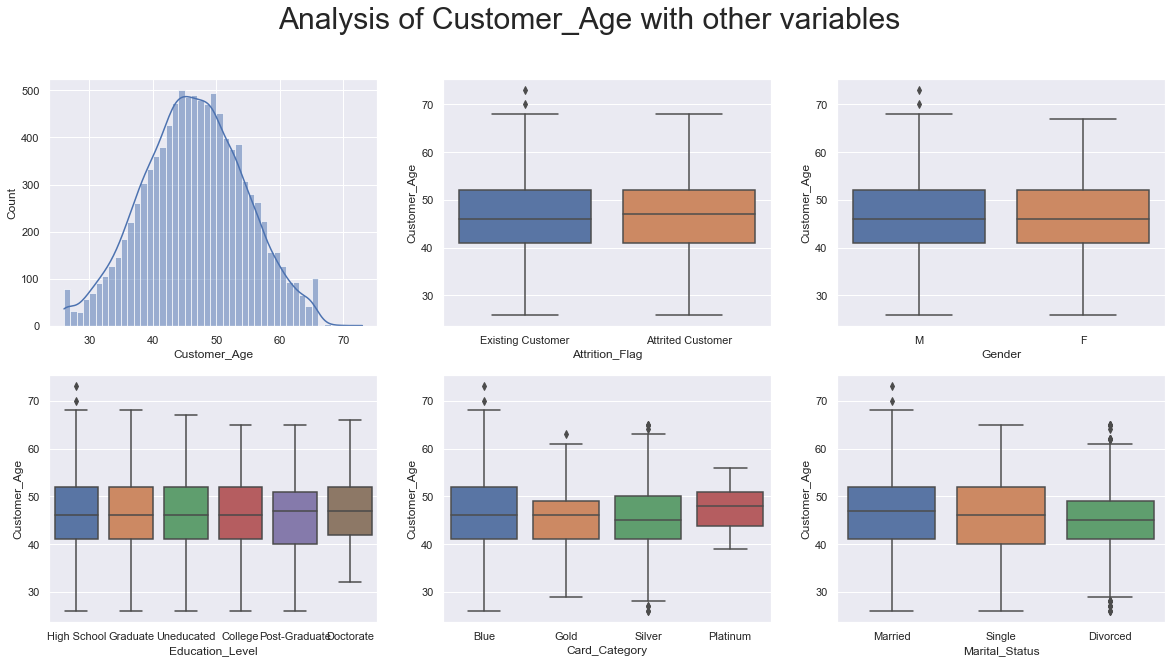

In [16]:
# Univariate and bivariate analysis
# This section deals with analysis of 'Customer_Age' - histogram and box plots of 'Customer_Age'
# versus 'Attrition_Flag','Gender','Education_Level', 'Income_Category', "Card_Category", "Marital_Status"
#'Customer_Age' here is the continous variable

# Display histogram and boxplots for Customer_Age analysis
# Make a grid of 2 rows and 4 columns
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# Put a figure title
fig.suptitle("Analysis of Customer_Age with other variables", fontsize=30)
# Histogram of Credit_Limit variable
sns.histplot(ax=axs[0, 0], data=customerData1, x="Customer_Age", kde=True)
# Box plot for Personal_Loan versus Income
sns.boxplot(
    ax=axs[0, 1],
    data=customerData1,
    x=customerData1["Attrition_Flag"],
    y=customerData1["Customer_Age"],
);
# The remaining boxplots have Customer_Age on the y-axis, and the rest of the variables on the x-axis (so treated as categories)

sns.boxplot(
    ax=axs[0, 2],
    data=customerData1,
    x=customerData1["Gender"],
    y=customerData1["Customer_Age"],
);

sns.boxplot(
    ax=axs[1, 0],
    data=customerData1,
    x=customerData1["Education_Level"],
    y=customerData1["Customer_Age"],
);
sns.boxplot(
    ax=axs[1, 1],
    data=customerData,
    x=customerData["Card_Category"],
    y=customerData["Customer_Age"],
);
sns.boxplot(
    ax=axs[1, 2],
    data=customerData1,
    x=customerData1["Marital_Status"],
    y=customerData1["Customer_Age"],
);
# We put semicolons to supress the axis output

#### Observations
<li> Customer_Age is a symmetric distribution with a mean and median around 46 years. </li>
<li> The ranges and medians are quite similar when it comes to how old the customers are and their gender, education level, which type of card they chose, or their marital status. There were also similar in terms of whether they were existing customers or attrited customers. </li>

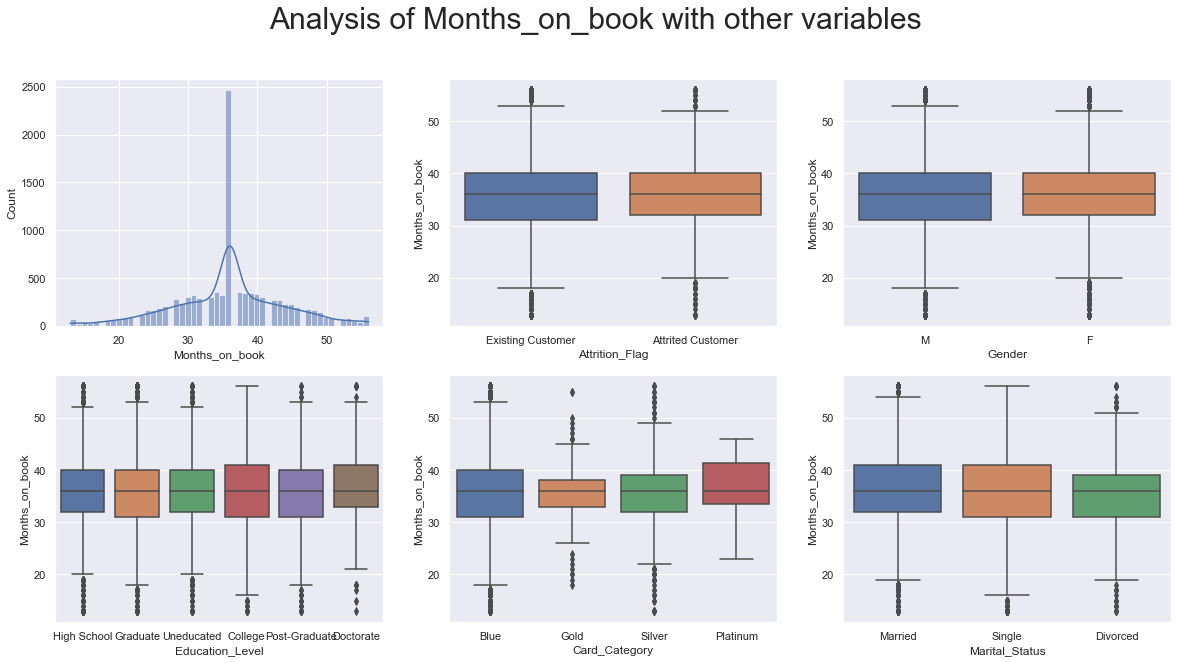

In [17]:
# Univariate and bivariate analysis
# This section deals with analysis of 'Months_on_book' - histogram and box plots of 'Months_on_book'
# versus 'Attrition_Flag','Gender','Education_Level', 'Income_Category', "Card_Category", "Marital_Status"
#'Months_on_book' here is the continous variable

# Display histogram and boxplots for Months_on_book analysis
# Make a grid of 2 rows and 4 columns
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# Put a figure title
fig.suptitle("Analysis of Months_on_book with other variables", fontsize=30)
# Histogram of Credit_Limit variable
sns.histplot(ax=axs[0, 0], data=customerData1, x="Months_on_book", kde=True)
# Box plot for Personal_Loan versus Income
sns.boxplot(
    ax=axs[0, 1],
    data=customerData1,
    x=customerData1["Attrition_Flag"],
    y=customerData1["Months_on_book"],
);
# The remaining boxplots have Months_on_book on the y-axis, and the rest of the variables on the x-axis (so treated as categories)

sns.boxplot(
    ax=axs[0, 2],
    data=customerData1,
    x=customerData1["Gender"],
    y=customerData1["Months_on_book"],
);

sns.boxplot(
    ax=axs[1, 0],
    data=customerData1,
    x=customerData1["Education_Level"],
    y=customerData1["Months_on_book"],
);
sns.boxplot(
    ax=axs[1, 1],
    data=customerData,
    x=customerData["Card_Category"],
    y=customerData["Months_on_book"],
);
sns.boxplot(
    ax=axs[1, 2],
    data=customerData1,
    x=customerData1["Marital_Status"],
    y=customerData1["Months_on_book"],
);
# We put semicolons to supress the axis output

#### Observations
<li> The Months_on_book variable - which indicates the period of relationship the customer has with the bank is mostly symmetric distribution, however, there is a large peak around 35 months (approximately). </li>
<li> The box plots of Months_on_book with regards to Attrition_Flag, Gender, Education_Level, Card_Category, Marital_Status are similar - the ranges and medians are similar between the categories in each plot. </li>

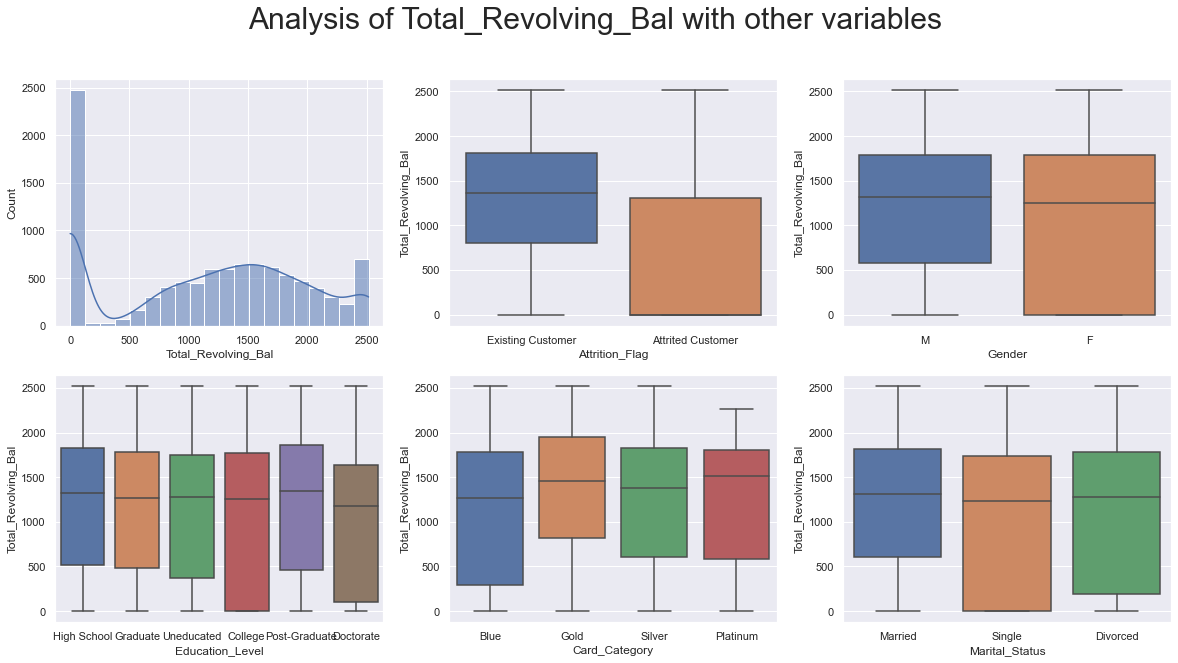

In [18]:
# Univariate and bivariate analysis
# This section deals with analysis of 'Total_Revolving_Bal' - histogram and box plots of 'Total_Revolving_Bal'
# versus 'Attrition_Flag','Gender','Education_Level', 'Income_Category', "Card_Category", "Marital_Status"
#'Total_Revolving_Bal' here is the continous variable

# Display histogram and boxplots for Total_Revolving_Bal analysis
# Make a grid of 2 rows and 4 columns
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# Put a figure title
fig.suptitle("Analysis of Total_Revolving_Bal with other variables", fontsize=30)
# Histogram of Credit_Limit variable
sns.histplot(ax=axs[0, 0], data=customerData1, x="Total_Revolving_Bal", kde=True)
# Box plot for Personal_Loan versus Income
sns.boxplot(
    ax=axs[0, 1],
    data=customerData1,
    x=customerData1["Attrition_Flag"],
    y=customerData1["Total_Revolving_Bal"],
);
# The remaining boxplots have Total_Revolving_Bal on the y-axis, and the rest of the variables on the x-axis (so treated as categories)

sns.boxplot(
    ax=axs[0, 2],
    data=customerData1,
    x=customerData1["Gender"],
    y=customerData1["Total_Revolving_Bal"],
);

sns.boxplot(
    ax=axs[1, 0],
    data=customerData1,
    x=customerData1["Education_Level"],
    y=customerData1["Total_Revolving_Bal"],
);
sns.boxplot(
    ax=axs[1, 1],
    data=customerData,
    x=customerData["Card_Category"],
    y=customerData["Total_Revolving_Bal"],
);
sns.boxplot(
    ax=axs[1, 2],
    data=customerData1,
    x=customerData1["Marital_Status"],
    y=customerData1["Total_Revolving_Bal"],
);
# We put semicolons to supress the axis output

#### Observations
<li> The Total_Revolving_Bal is the balance that carries over from one month to the next. There are peaks around 0 dollars and 2500 dollars with the peak at 0 dollars being larger.</li>
<li> When it comes to Total_Revolving_Bal with respect to Attrition_Flag - we find that there are differences between the range and medians between existing customers and attrited customers. 50 percent of existing customers have a Total_Revolving_Bal of 800 to 1800 dollars. However, 50 percent of attrited customers have a Total_Revolving_Bal of 0 dollars to approximately 1200 dollars (which is less than the median of the Total_Revolving_Bal of the existing customers). </li>
<li> While the median Total_Revolving_Bal is similar for males and females, the range for females is 0 to 1800 while for males it is 600 to 1800. </li>
<li> With respect to education level, the medians are similar in the education groups for Total_Revolving_Bal. The College and Doctorate group has a lower limit of 0 dollars as compared to other groups. </li>
<li> Overall, the medians for Total_Revolving_Bal are similar among the card categories. </li>
<li> In the Marital_Status box plot, while the medians are similar among the married, single and divorced groups - the single customer group had a lower limit of 0 dollars for Total_Revolving_Bal. </li>

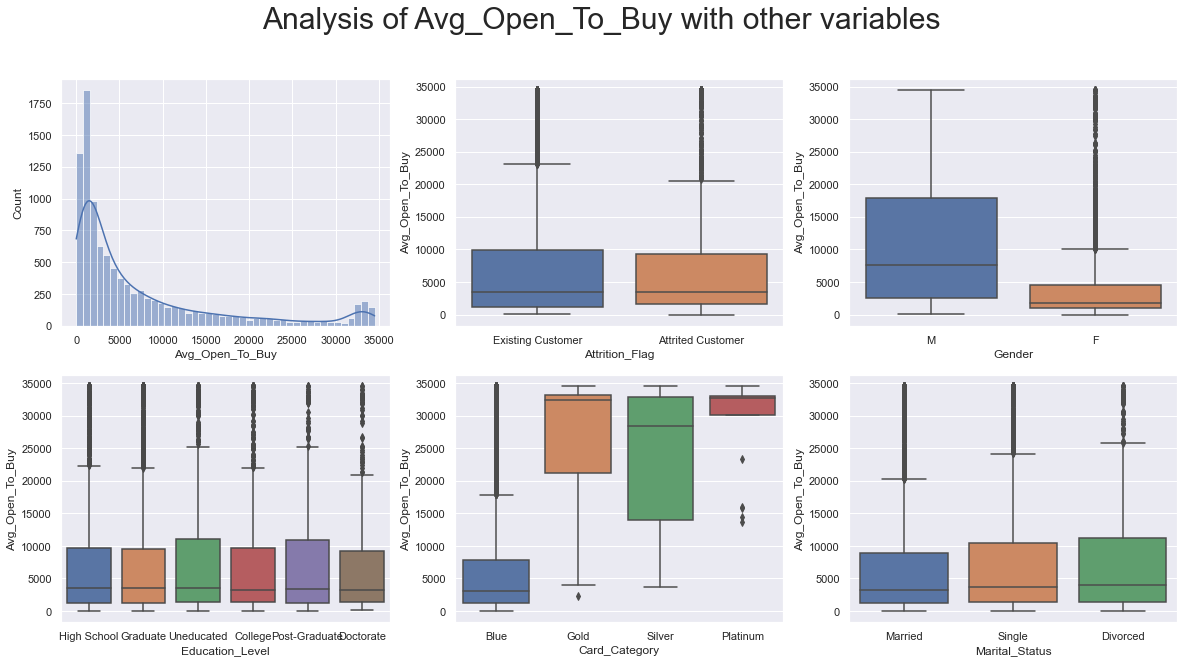

In [19]:
# Univariate and bivariate analysis
# This section deals with analysis of 'Avg_Open_To_Buy' - histogram and box plots of 'Avg_Open_To_Buy'
# versus 'Attrition_Flag','Gender','Education_Level', 'Income_Category', "Card_Category", "Marital_Status"
#'Avg_Open_To_Buy' here is the continous variable

# Display histogram and boxplots for Avg_Open_To_Buy analysis
# Make a grid of 2 rows and 4 columns
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# Put a figure title
fig.suptitle("Analysis of Avg_Open_To_Buy with other variables", fontsize=30)
# Histogram of Credit_Limit variable
sns.histplot(ax=axs[0, 0], data=customerData1, x="Avg_Open_To_Buy", kde=True)
# Box plot for Personal_Loan versus Income
sns.boxplot(
    ax=axs[0, 1],
    data=customerData1,
    x=customerData1["Attrition_Flag"],
    y=customerData1["Avg_Open_To_Buy"],
);
# The remaining boxplots have Avg_Open_To_Buy on the y-axis, and the rest of the variables on the x-axis (so treated as categories)

sns.boxplot(
    ax=axs[0, 2],
    data=customerData1,
    x=customerData1["Gender"],
    y=customerData1["Avg_Open_To_Buy"],
);

sns.boxplot(
    ax=axs[1, 0],
    data=customerData1,
    x=customerData1["Education_Level"],
    y=customerData1["Avg_Open_To_Buy"],
);
sns.boxplot(
    ax=axs[1, 1],
    data=customerData,
    x=customerData["Card_Category"],
    y=customerData["Avg_Open_To_Buy"],
);
sns.boxplot(
    ax=axs[1, 2],
    data=customerData1,
    x=customerData1["Marital_Status"],
    y=customerData1["Avg_Open_To_Buy"],
);
# We put semicolons to supress the axis output

#### Observations
<li> The Avg_Open_To_Buy refers to the amount left on the credit card to use is a right skewed distribution (the tail is on the right). The range is 0 to 35,000 dollars. </li>
<li> The range and medians for existing customers versus attrited customers for Avg_Open_To_Buy are similar. </li>
<li> With respect to gender, there are considerable data points that lie beyond the upper whisker for the female category. The medians between the male and female categories for Avg_Open_To_Buy are different - with the female category having a lower median as compared to the male category. </li>
<li> The medians and ranges are similar for Avg_Open_To_Buy with respect to education level. </li>
<li> For card category, the median Avg_Open_To_Buy is considerably less than the medians for Gold, silver, Platinum category. The data points outside of the upper whisker are also more for Blue category. The platinum category also has couple of outliers, but on the lower whisker side. </li>
<li> The medians, range and pattern of outliers are similar for the last box plot which is for Marital_Status and Avg_Open_To_Buy. </li>

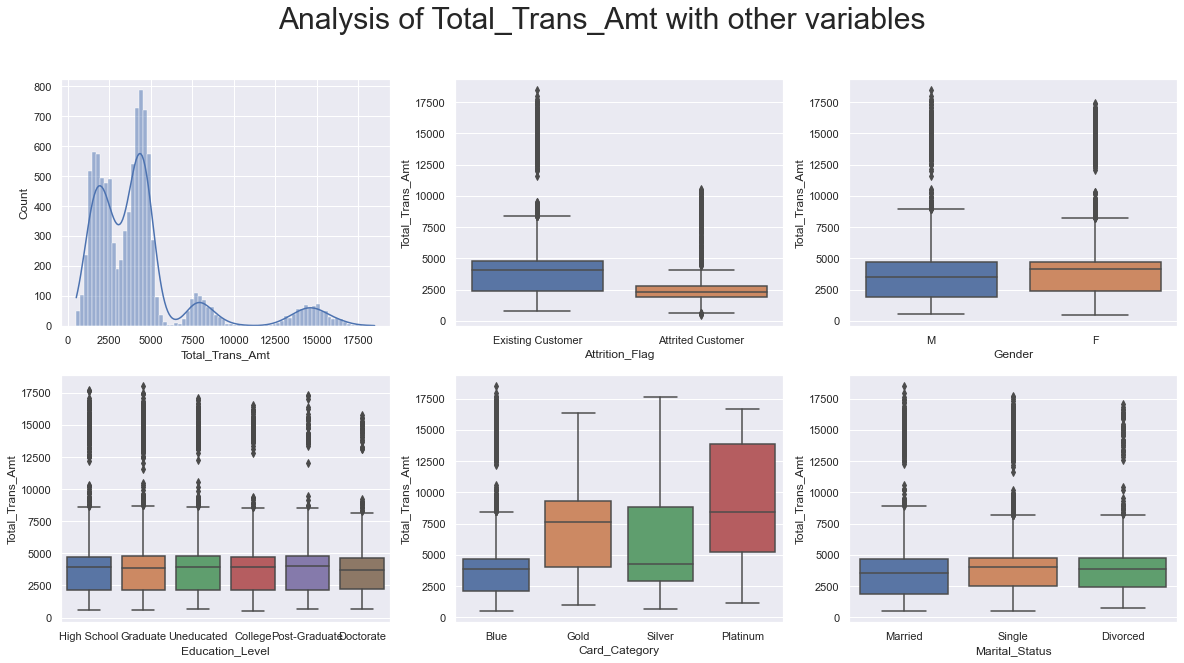

In [20]:
# Univariate and bivariate analysis
# This section deals with the analysis of 'Total_Trans_Amt" - histogram and box plots of 'Total_Trans_Amt'
# versus 'Attrition_Flag','Gender','Education_Level', 'Income_Category', "Card_Category", "Marital_Status"
#'Total_Trans_Amt' here is the continous variable

# Display histogram and boxplots for Total_Trans_Amt analysis
# Make a grid of 2 rows and 4 columns
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# Put a figure title
fig.suptitle("Analysis of Total_Trans_Amt with other variables", fontsize=30)
# Histogram of Credit_Limit variable
sns.histplot(ax=axs[0, 0], data=customerData1, x="Total_Trans_Amt", kde=True)
# Box plot for Personal_Loan versus Income
sns.boxplot(
    ax=axs[0, 1],
    data=customerData1,
    x=customerData1["Attrition_Flag"],
    y=customerData1["Total_Trans_Amt"],
);
# The remaining boxplots have Total_Trans_Amt on the y-axis, and the rest of the variables on the x-axis (so treated as categories)

sns.boxplot(
    ax=axs[0, 2],
    data=customerData1,
    x=customerData1["Gender"],
    y=customerData1["Total_Trans_Amt"],
);

sns.boxplot(
    ax=axs[1, 0],
    data=customerData1,
    x=customerData1["Education_Level"],
    y=customerData1["Total_Trans_Amt"],
);
sns.boxplot(
    ax=axs[1, 1],
    data=customerData,
    x=customerData["Card_Category"],
    y=customerData["Total_Trans_Amt"],
);
sns.boxplot(
    ax=axs[1, 2],
    data=customerData1,
    x=customerData1["Marital_Status"],
    y=customerData1["Total_Trans_Amt"],
);
# We put semicolons to supress the axis output

#### Observations
<p> The distribution for Total_Trans_Amt (which is the total transaction amount in the last 12 months) has multiple peaks, and the range is 0 to 17500. When it comes to Attrition_Flag - the median Total_Trans_Amt is different and lower as compared to the median for existing customers. There was some difference between the medians for Total_Trans_Amt for gender, but not significantly different. For education level, the median and ranges for Total_Trans_Amt are similar. The same observation can be made for Marital_Status. However, when it comes to card category - the median Total_Trans_Amt for Platinum category is different than the median Total_Trans_Amt for Blue category. This can be attributed to the Platinum category having a higher credit limit. </p>

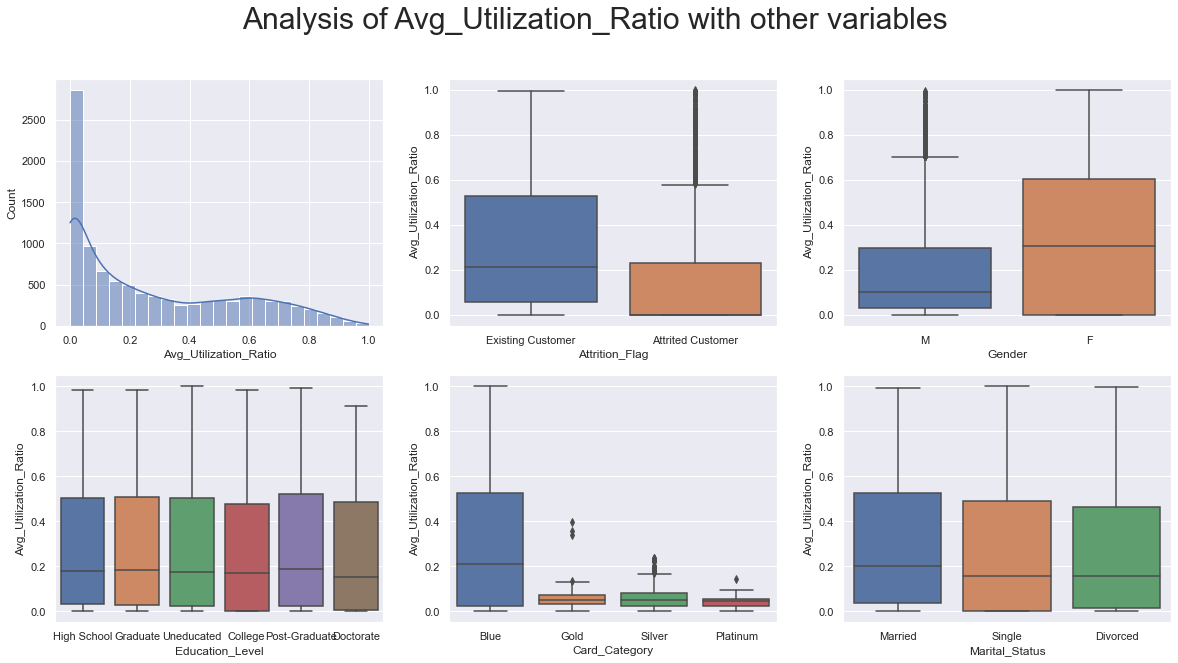

In [21]:
# Univariate and bivariate analysis
# This section deals with analysis of 'Avg_Utilization_Ratio" - histogram and box plots of 'Avg_Utilization_Ratio'
# versus 'Attrition_Flag','Gender','Education_Level', 'Income_Category', "Card_Category", "Marital_Status"
#'Avg_Utilization_Ratio' here is the continous variable

# Display histogram and boxplots for Avg_Utilization_Ratio analysis
# Make a grid of 2 rows and 4 columns
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# Put a figure title
fig.suptitle("Analysis of Avg_Utilization_Ratio with other variables", fontsize=30)
# Histogram of Credit_Limit variable
sns.histplot(ax=axs[0, 0], data=customerData1, x="Avg_Utilization_Ratio", kde=True)
# Box plot for Personal_Loan versus Income
sns.boxplot(
    ax=axs[0, 1],
    data=customerData1,
    x=customerData1["Attrition_Flag"],
    y=customerData1["Avg_Utilization_Ratio"],
)
# The remaining boxplots have Avg_Utilization_Ratio on the y-axis, and the rest of the variables on the x-axis (so treated as categories)

sns.boxplot(
    ax=axs[0, 2],
    data=customerData1,
    x=customerData1["Gender"],
    y=customerData1["Avg_Utilization_Ratio"],
);

sns.boxplot(
    ax=axs[1, 0],
    data=customerData1,
    x=customerData1["Education_Level"],
    y=customerData1["Avg_Utilization_Ratio"],
);
sns.boxplot(
    ax=axs[1, 1],
    data=customerData,
    x=customerData["Card_Category"],
    y=customerData["Avg_Utilization_Ratio"],
);
sns.boxplot(
    ax=axs[1, 2],
    data=customerData1,
    x=customerData1["Marital_Status"],
    y=customerData1["Avg_Utilization_Ratio"],
);
# We put semicolons to supress the axis output

#### Observations
<p> The Avg_Utilization_Ratio is a right-skewed distribution (tail is on the right). The Avg_Utilization_Ratio represents how much of the credit the customer spent. There are differences between the median Avg_Utilization_Ratio between existing customer versus attrited customer with the attrited customers have a lower range and median of Avg_Utilization_Ratio. The median Avg_Utilization_Ratio are similar among groups of gender, education level, card category, and their marital status groups. With respect to range, we can observe that for blue category the range of Avg_Utilization_Ratio is larger as compared to that of Gold, Silver or Platinum. This can be interpreted that Blue customers are utilizing their credit to a larger extent than Gold, Silver, or  Platinum customers. One of the factors driving this may be that the credit limit for Blue customers is much less as compared to Gold, Silver, Platinum category. </p>

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

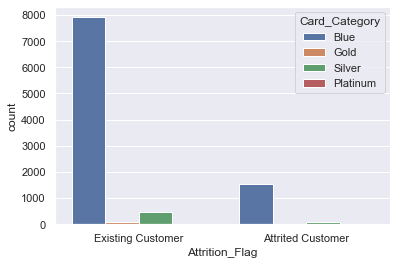

In [22]:
# To analyze which card category has highest number of attrited customers
sns.countplot(x="Attrition_Flag", hue="Card_Category", data=customerData1)

#### Observations
<p> From the above catplot, we can observe that the largest group of existing customers have Blue card type product. But also the Blue category had the largest number of attrited customers. </p>

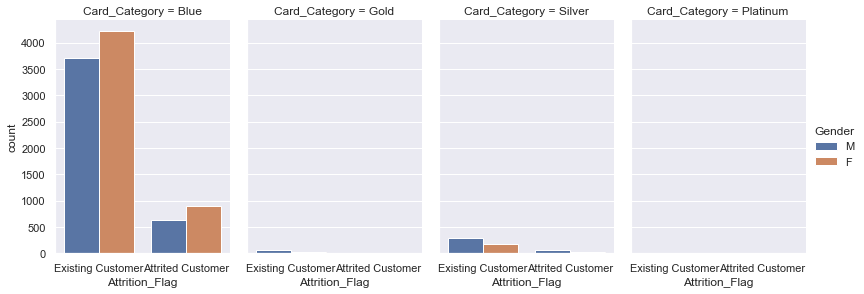

In [23]:
# Analysis using both numerical and categorical variables
g = sns.catplot(
    x="Attrition_Flag",
    hue="Gender",
    col="Card_Category",
    data=customerData1,
    kind="count",
    height=4,
    aspect=0.7,
)

#### Observations
<p> The females were higher in Blue card category for both existing and attrited customers. </p>

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

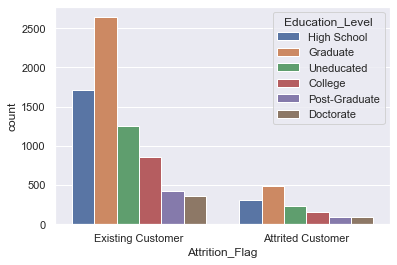

In [24]:
sns.countplot(x="Attrition_Flag", hue="Education_Level", data=customerData1)

#### Observations
<p> The customers who formed the largest group for existing customers as well as attrited customers were Graduates. </p>

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

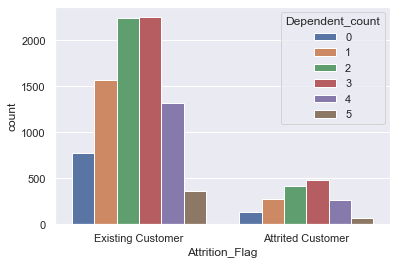

In [25]:
sns.countplot(x="Attrition_Flag", hue="Dependent_count", data=customerData1)

#### Observations
<p> The largest number of customers for existing customer and attrited customer were customers who had a dependent count of 2 and 3. </p>

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

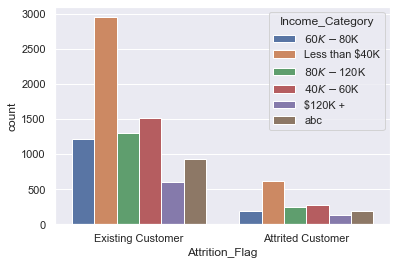

In [26]:
sns.countplot(x="Attrition_Flag", hue="Income_Category", data=customerData1)

#### Observations
<p> With respect to income category, the largest group of customers in the existing customer category were customers who had a less than 40,000 dollars per annum. The less than 40K per annum group was also the largest among the atrited customers. </p>

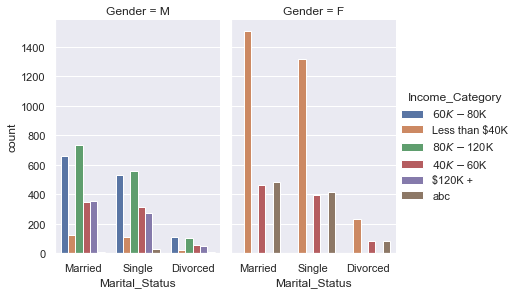

In [27]:
# Analysis using multiple categorical variables
g = sns.catplot(
    x="Marital_Status",
    hue="Income_Category",
    col="Gender",
    data=customerData1,
    kind="count",
    height=4,
    aspect=0.7,
)

#### Observation
<p> We can observe that the female gender were in the less  than 40 thousand dollars per annum category for married, single and divorced females. The 80k-120K category was higher among married, single, divorced males. </p>

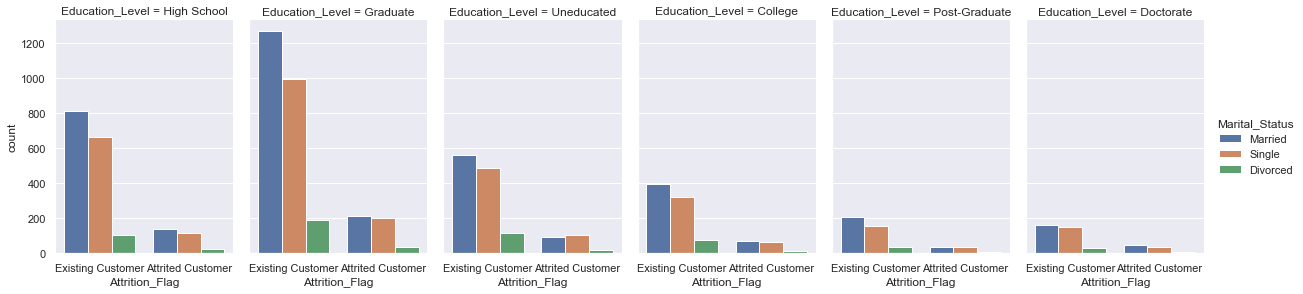

In [28]:
# Analysis using multiple categorical variables
g = sns.catplot(
    x="Attrition_Flag",
    hue="Marital_Status",
    col="Education_Level",
    data=customerData1,
    kind="count",
    height=4,
    aspect=0.7,
)

#### Observations
<p> Married graduates formed the largest customer group for existing customers while married graduates as well as single graduates formed the largest group for attrited customers as seen above. </p>

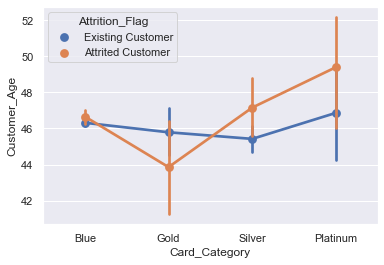

In [29]:
# Analysis using both numerical and categorical variables
sns.pointplot(x="Card_Category", y="Customer_Age", hue="Attrition_Flag", data=customerData1)
plt.show()

#### Observations
<p> The attrited customers for platinum and silver card categories were slightly higher in age as compared to existing customers. While in the gold card category, the attrited customers were slightly lower in age as compared to existing customers. For the blue category, the ages of the customers were similar. </p>

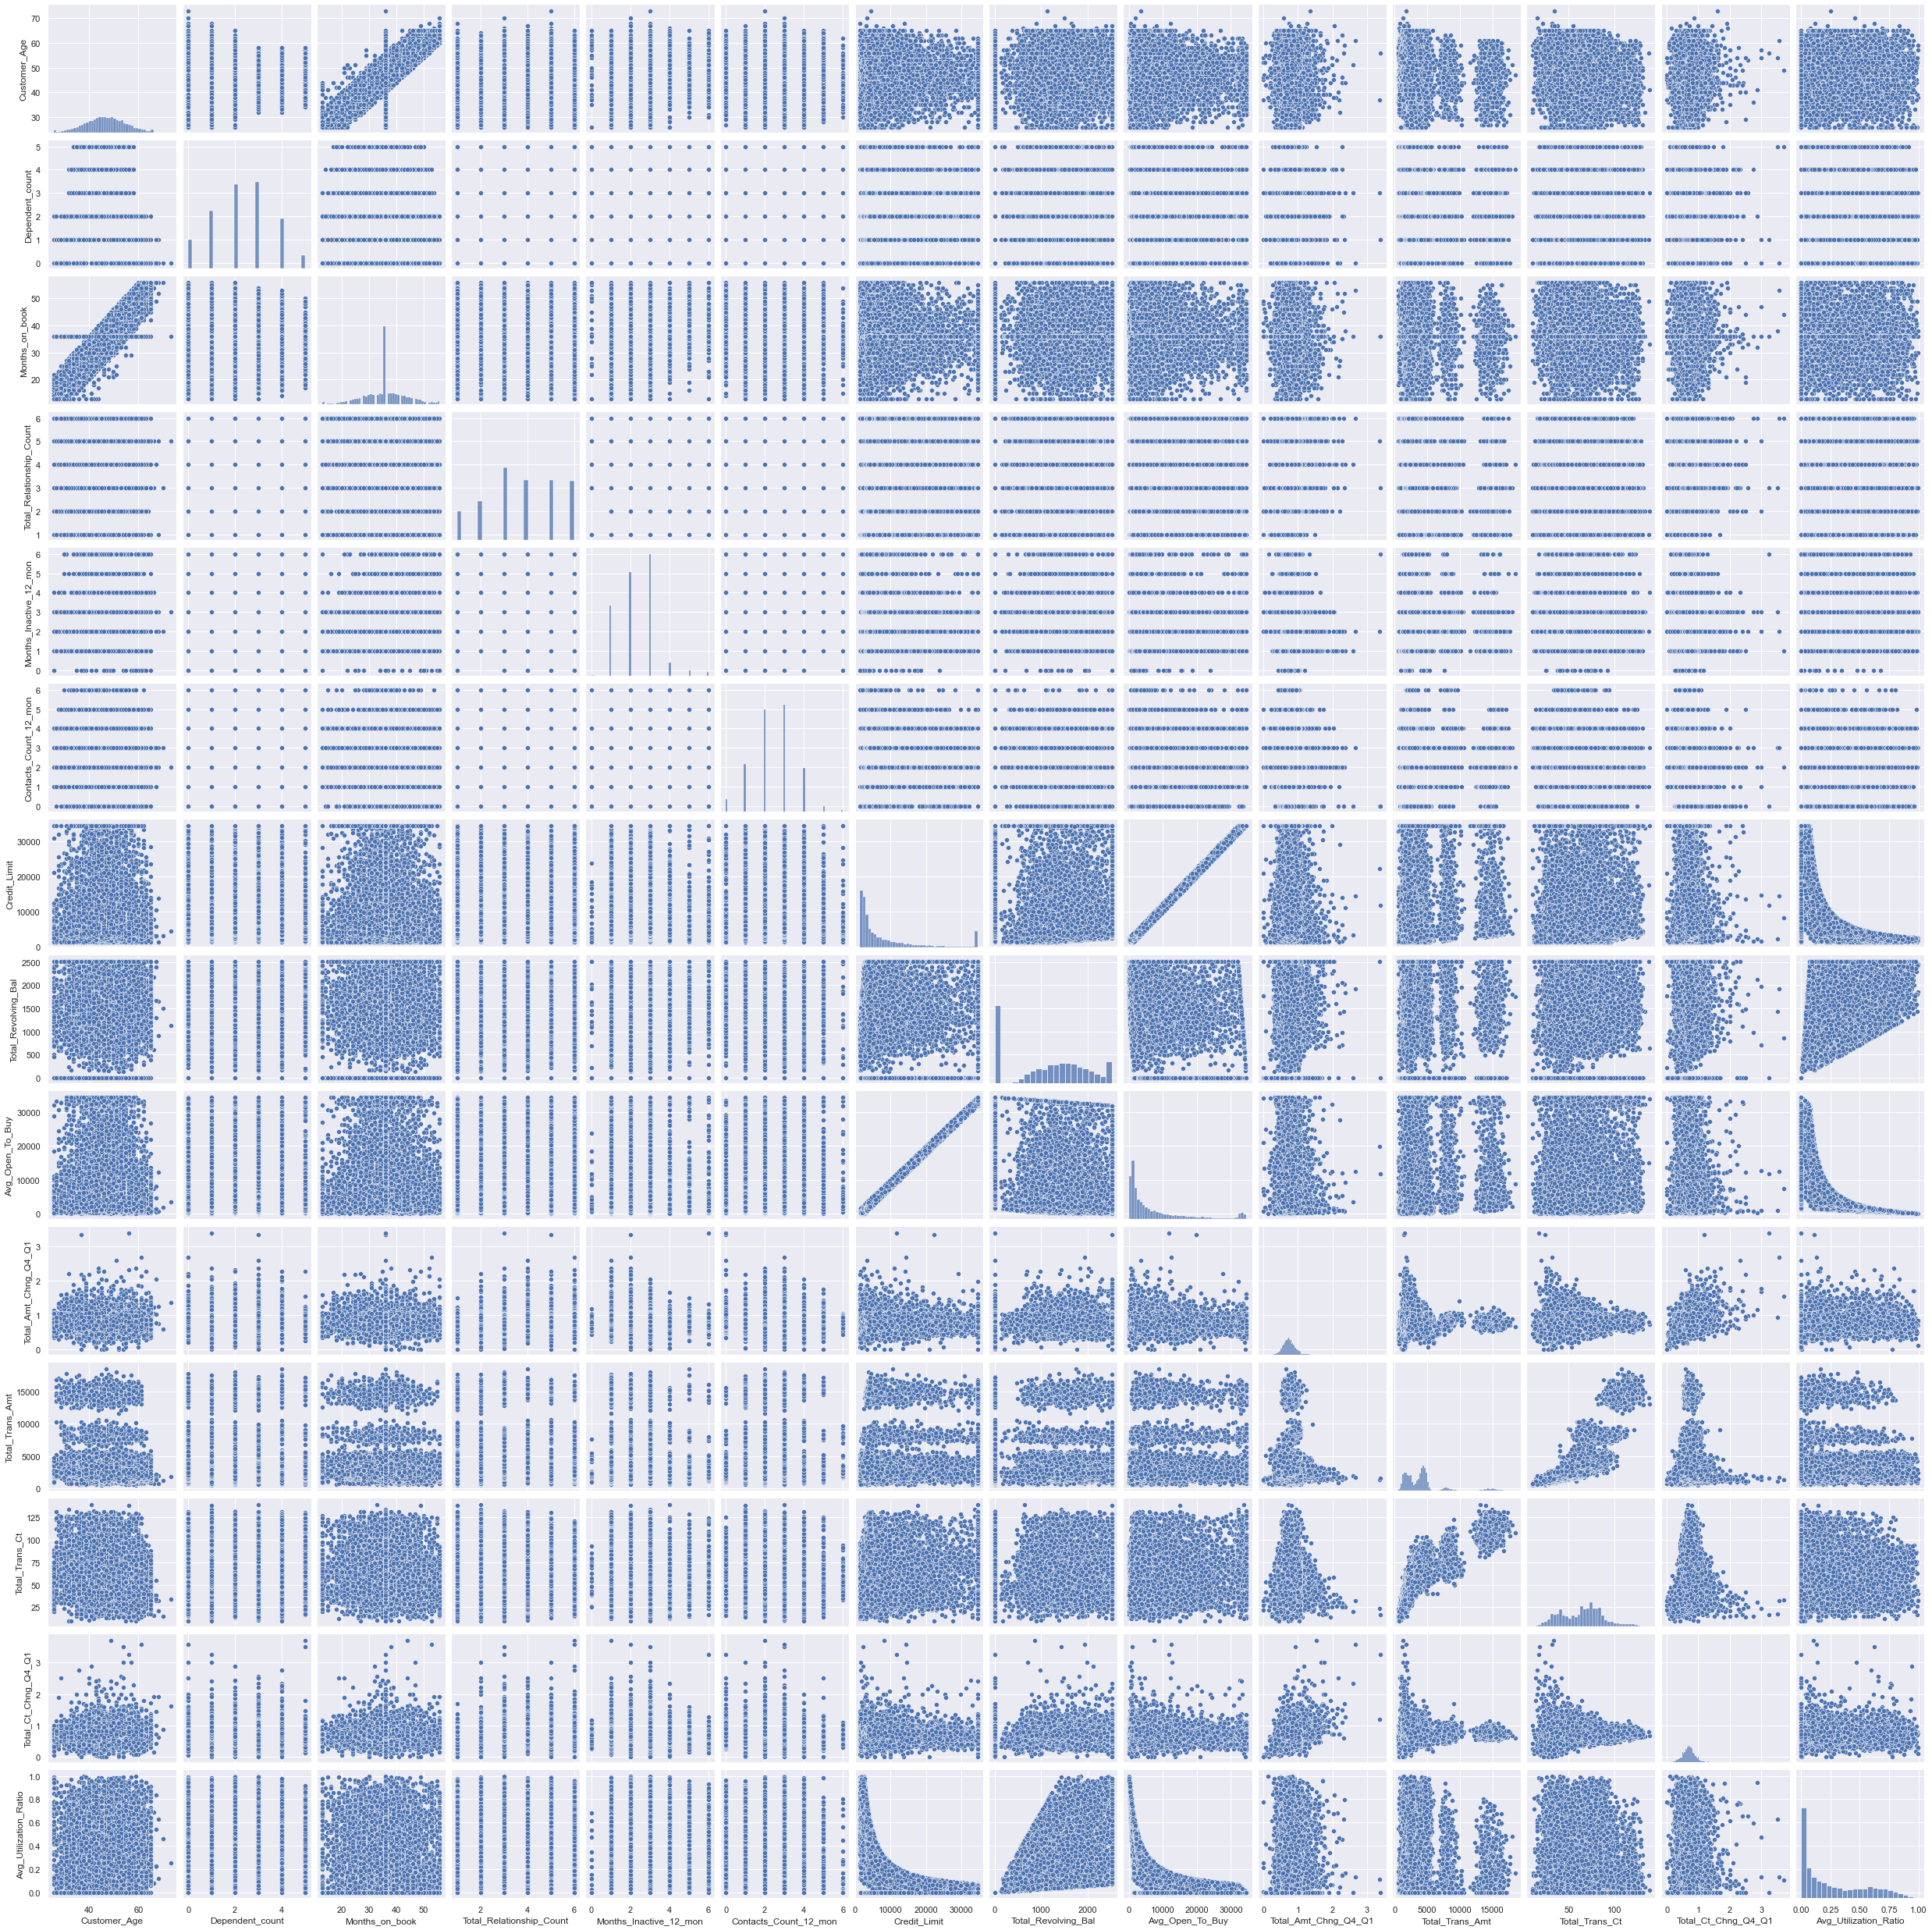

In [30]:
#pairplot 
sns.pairplot(customerData1);

#### Observations
<p> The pair plot gives us a bird's eye view - we can observe that customer_Age is symmetric, some other continous variables like Credit_Limit are skewed, and some distributions have multiple peaks. We can also see some correlation between variables, and we will use a correlation heatmap to evaluate these correlations. </p>

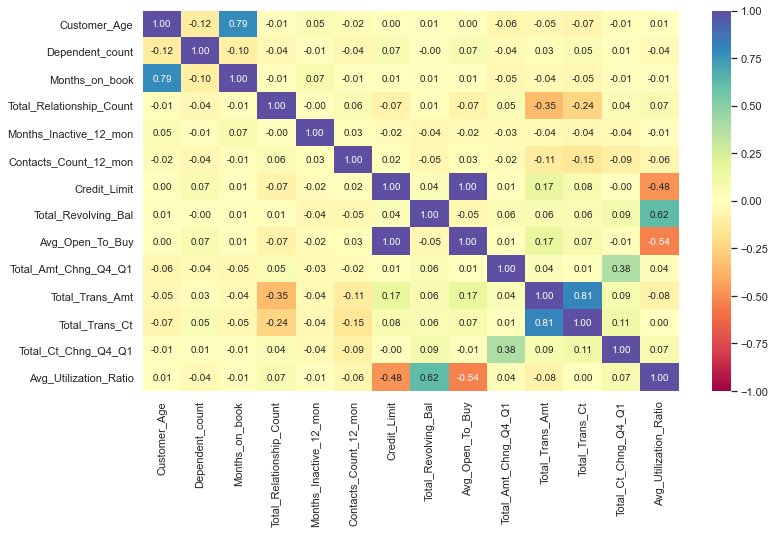

In [31]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    customerData1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations
<p> The first observation we can make is that the Avg_Open_To_Buy is strongly correlated to Credit_Limit (1.00). Hence, we will drop the Avg_Open_To_Buy column in the data preprocessing section. There are two more sets that have high correlation - Total_Trans_Amt with Total_Trans_Ct (0.81), and Customer_Age and Months_on_book (0.79). Since they are highly correlated, we will drop columns Total_Trans_Ct and Months_on_book in the data pre-processing section. Columns Total_Revolving_Bal and Avg_Utilization_Ratio have a correlation of 0.62 (moderate correlation). The Total_Revolving_Bal represents the balance that carries over from one month to the next, while the Avg_Utilization_Ratio represents how much available credit the customer spent. Based on their definitions and the moderate correlation score, we will drop the Avg_Utilization_Ration in the data preprocessing section. </p>
<p> The Avg_Open_To_Buy has a moderage negative correlation to Avg_Utilization_Ratio (0.54), 0.48 between Avg_Utilization_Ratio and Credit_Limit, Total_Ct_Chng_Q4_Q1 to Total_Amt_Chng_Q4_Q1 (0.38). A negative weak correlation between Total_Trans_Amt and Total_Relationship_Count (-0.35) and Total_Trans_Ct and Total_Relationship_Count (-0.24). </p>

### 7. Data pre-processing section/model preparation section

<p> This section will have the following subsections:</p>
<ol>
    <li> Treating "abc" values in Income_Category variable </li>
    <li> Evaluation of outliers </li>
    <li> Dropping columns that are correlated from dataset </li>
    <li> Missing value treatment without data leakage/splitting the dataset/encoding of target variable </li>
    <li> Encoding of categorical variables </li>
  

##### 7.1 Treating "abc" values in Income_Category variable

In [32]:
# For "abc" values in Income_Category variable, we will conver the "abc" values to NaN and then replace the NaNs 
# when we do missing value treatment without data leakage
# copy the dataframe

customerData3 = customerData1.copy()

In [33]:
# Replacing abc with NaN
customerData3["Income_Category"] = customerData3["Income_Category"].replace("abc",np.nan )

In [34]:
# Checking to see how many missing values are there in the dataframe
customerData3.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

#### Observations
<p> There are 3 columns in the data set that have missing values - Education_Level (1519 values), Marital_Status(749 values), and Income_Category (1112 values). </p>

In [35]:
# Another check to see the unique values in Income_Category
customerData3["Income_Category"].value_counts(dropna=False)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
NaN               1112
$120K +            727
Name: Income_Category, dtype: int64

#### Observations
<p> The "abc" has been successfully replaced by NaN values </p>

#### 7.2 Evaluation of Outliers

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

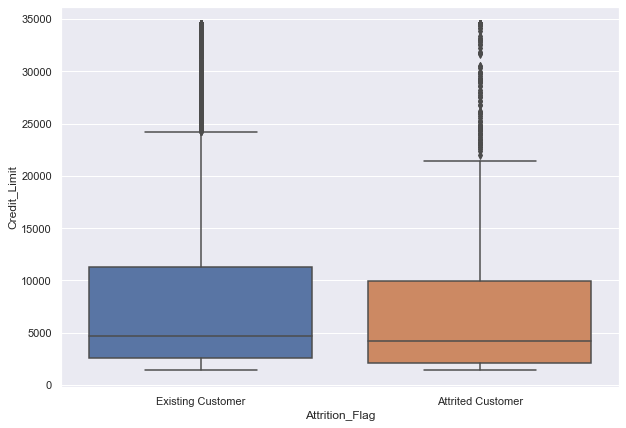

In [36]:
# Consider the graph below as an example of evaluation of outliers
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Credit_Limit", x="Attrition_Flag", data=customerData3, orient="vertical")

<p> During the EDA process, we observed that several of the variables such as Credit_Limit with Attrition_Flag showed outliers (data points outside the upper whiskers in above example). However, the customers have different card categories (Blue, Gold, Silver, Platinum) and these card categories have different credit limits (Gold, Silver, Platinum - all three have an upper limit of 35,000 dollars). Thus, data points that are showing up beyond the upper whisker with Credit_Limit values between 25,000 and 35,000 are likely to not be data collection errors/extreme values.Hence, for analysis of this particular data set, we will not treat outliers as we will consider them to not be errors. </p> 

#### 7.3 Dropping correlated columns

In [37]:
# Dropping 4 columns that are correlated as we analyzed in the EDA
customerData3.drop(
    columns=[
        "Months_on_book",
        "Total_Trans_Ct",
        "Avg_Utilization_Ratio",       
        "Avg_Open_To_Buy",
    ],
    inplace=True,
)

In [38]:
# Checking info on CustomerData3
customerData3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  float64

#### Observations
<p> The original dataset had 20 columns, and we are dropping 4 correlated ones - so the resulting data set is 10127 x 16. </p>

#### 7.4 Missing value treatment without data leakage, encoding the target variable

In [39]:
# We will use KNN imputer (missing data is only for categorical variables)
imputer = KNNImputer(n_neighbors=5)

In [40]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = [
    "Education_Level",
    "Marital_Status",
    "Income_Category",
   ]

In [41]:
# Unique calues for the 3 columns where we will fill missing values
customerData3[reqd_col_for_impute].value_counts()

Education_Level  Marital_Status  Income_Category
Graduate         Married         Less than $40K     528
                 Single          Less than $40K     447
High School      Married         Less than $40K     310
                 Single          Less than $40K     267
Graduate         Married         $40K - $60K        251
                                 $80K - $120K       239
Uneducated       Married         Less than $40K     229
                 Single          Less than $40K     219
Graduate         Single          $40K - $60K        217
                 Married         $60K - $80K        205
                 Single          $80K - $120K       174
High School      Married         $40K - $60K        162
College          Married         Less than $40K     152
High School      Married         $60K - $80K        150
                                 $80K - $120K       148
Graduate         Single          $60K - $80K        147
High School      Single          $40K - $60K        145

In [42]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
Marital_Status = {"Married": 0, "Single": 1, "Divorced": 2}
customerData3["Marital_Status"] = customerData3["Marital_Status"].map(Marital_Status)

Education_Level = {
    "Doctorate": 0,
    "Post-Graduate": 1,
    "Graduate": 2,
    "College": 3,
    "High School": 4,
    "Uneducated":5,
}
customerData3["Education_Level"] = customerData3["Education_Level"].map(Education_Level)

Income_Category = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$60K - $80K": 2,
    "80K-120K": 3,
    "$120K +": 4,
    
}
customerData3["Income_Category"] = customerData3["Income_Category"].map(Income_Category)

In [43]:
customerData3["Education_Level"].value_counts(dropna=False)

2.0    3128
4.0    2013
NaN    1519
5.0    1487
3.0    1013
1.0     516
0.0     451
Name: Education_Level, dtype: int64

In [44]:
# Checking the dataframe to see the mapping categories
customerData3.head()

Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                            
768805383  Existing Customer            45      M                3   
818770008  Existing Customer            49      F                5   
713982108  Existing Customer            51      M                3   
769911858  Existing Customer            40      F                4   
709106358  Existing Customer            40      M                3   

           Education_Level  Marital_Status  Income_Category Card_Category  \
CLIENTNUM                                                                   
768805383              4.0             0.0              2.0          Blue   
818770008              2.0             1.0              0.0          Blue   
713982108              2.0             0.0              NaN          Blue   
769911858              4.0             NaN              0.0          Blue   
709106358              5.0             0.0              2.0          Blue   

           Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                     
768805383                         5                       1   
818770008                         6                       1   
713982108                         4                       1   
769911858                         3                       4   
709106358                         5                       1   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
768805383                      3       12691.0                  777   
818770008                      2        8256.0                  864   
713982108                      0        3418.0                    0   
769911858                      1        3313.0                 2517   
709106358                      0        4716.0                    0   

           Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Ct_Chng_Q4_Q1  
CLIENTNUM                                                              
768805383                 1.335             1144                1.625  
818770008                 1.541             1291                3.714  
713982108                 2.594             1887                2.333  
769911858                 1.405             1171                2.333  
709106358                 2.175              816                2.500

In [45]:
# Target variable is Attrition_Flag which has data in the form of "Existing Customer" and "Attrited Customer"
# We will use lambda function to convert this to "1" and "0"
X = customerData3.drop(["Attrition_Flag"], axis=1)
y = customerData3["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

In [46]:
# Checking to see y variable has been encoded correctly
y.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [47]:
# Before we impute missing values, we will split the data into training, validation and testing sets
# to prevent data leakage

# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 15) (2026, 15) (2026, 15)


In [48]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print("Number of columns in train data =", X_train.shape[1])
print("Number of columns in validation data =", X_val.shape[1])
print("Number of columns in test data =", X_test.shape[1])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026
Number of columns in train data = 15
Number of columns in validation data = 15
Number of columns in test data = 15


In [49]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the train data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute]) # this is test set, so only transform

In [50]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("*" * 30)
print(X_val.isna().sum())
print("*" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
dtype: int64
******************************
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
dtype: int64
******************************
Customer_Age

In [51]:
# After missing value imputation on train, test, validation sets, we have to reverse the encoding
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [52]:
inverse_mapping(Marital_Status, "Marital_Status")

inverse_mapping(Education_Level, "Education_Level")

inverse_mapping(Income_Category, "Income_Category")

In [53]:
# checking the unique values in all the category variables for train, test, validation sets
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         2013
College          1358
High School      1257
Uneducated        881
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     3033
Single      2612
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2754
$40K - $60K       1726
$60K - $80K       1146
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


In [54]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
Graduate         658
College          445
High School      417
Uneducated       306
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     1017
Single       853
Divorced     156
Name: Marital_Status, dtype: int64
******************************
Less than $40K    918
$40K - $60K       588
$60K - $80K       384
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************


In [55]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    1070
M     956
Name: Gender, dtype: int64
******************************
Graduate         701
College          431
High School      393
Uneducated       300
Post-Graduate    103
Doctorate         98
Name: Education_Level, dtype: int64
******************************
Married     981
Single      883
Divorced    162
Name: Marital_Status, dtype: int64
******************************
Less than $40K    888
$40K - $60K       589
$60K - $80K       407
$120K +           142
Name: Income_Category, dtype: int64
******************************
Blue        1876
Silver       119
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
******************************


#### 7.5 Encoding of the categorical variables (excluding target variable) after missing value imputation

In [56]:
# we will use pd.get_dummies to encode the categorical variables in train, test and validation sets. 
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 24) (2026, 24) (2026, 24)


#### Observations
<p> This concludes the data preprocessing and model preparation section. The final split is 6075 rows and 25 columns for training set, 2026 rows and 25 columns for validation and testing sets. </p>

### 8. Model building and performance evaluation

<p> Note about model predictions </p>
<p> The dependent variable in this analysis is the Attrition_Flag. </p>
<p> If Attrition_Flag = Attrited Customer, we have assigned Attrition_Flag = 1.
 If Attrition_Flag = Existing  Customer, we have assigned Attrition_Flag = 0. </p>
<p> To evaluate which performance metric is most valuable for the analysis, we have to consider</p>
<p> (a) Predicting that a customer will be an attrited customer, but the customer stayed - loss of opportunity (false positive)</p>
<p> (b) Predicting that a customer will stay, but the customer attrited - loss of revenue (false negative)</p>
<p> For the bank, loss of revenue has a higher cost than loss of opportunity. Hence, we want to minimize false negatives, and thus, we shall use recall (sensitivity) as our most important performance metric for the models.</p> 
    
    

#### Note about model building
<p> There will be 6 models built in this section and there will be 3 steps: </p>
<p>   <strong>Step 1:</strong> Models built - (a) Logistic Regression (b) Decision Tree (c) Random Forest (d) Bagging (e) Adaboost (f) gradient descent. All the models will use kfold, and recall will be the performance metric for evaluating performance on training set and validation set.</p>
<p>  <strong> Step 2:</strong> Models with oversampling (SMOTE) - (a) Logistic Regression (b) Decision Tree (c) Random Forest (d) Bagging (e) Adaboost (f) gradient descent. All the models will use kfold, and recall will be the performance metric for evaluating performance on training set and validation set.</p>
<p>   <strong> Step 3 :</strong> Models with undersampling - (a) Logistic Regression (b) Decision Tree (c) Random Forest (d) Bagging (e) Adaboost (f) gradient descent. All the models will use kfold, and recall will be the performance metric for evaluating performance on training set and validation set.</p>
<p>   <strong> Step 4 :</strong>Evaluate performance and choose the best 3 performing models for next section.</p>

In [57]:
#Step 1: Building the basic 6 models as outlined above
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient boosting", GradientBoostingClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 33.50601779173207
Decision tree: 72.54160125588697
Random forest: 65.47043432757718
Bagging: 72.23181580324439
Adaboost: 73.35740450026165
Gradient boosting: 75.0

Training Performance:

Logistic regression: 34.22131147540984
Decision tree: 100.0
Random forest: 100.0
Bagging: 97.54098360655738
Adaboost: 75.0
Gradient boosting: 81.76229508196722


#### Observations
<p> The above data set is an imbalanced dataset (83% are existing customers, 17 percent are attrited customers).</p>
<li> Logistic regression - The recall scores are extremely low for logistic regression models (influenced by an imbalanced data set). It is 34.2% for training, and 33.3% for validation set. This indicates underfitting of the model where the model is not capturing enough information. </li>
<li>Decision Tree - if we look at training performance, decision tree has 100% for recall scores. This indicates overfitting (since decision tree is not pruned here) and most likely the model will perform poorly on the testing set. Since we use kfold, we can look at the cross validation scores - and decision tree has a recall of 72.5% as compared to 100% on the training set. This points to a poorly performing, not generalized, overfit model. </li>
<li> Random forest - random forest is similar to decision tree in terms of training performance (100%). On the cross validation section, it is having a recall of 65.4%. This indicates an overfit model that is not generalized.</li>
<li> Bagging - Bagging model had a training score of 97.5 and 72.3% on the cross validated set. This huge difference indicates that the model is not generalized as well as overfit. </li>
<li> Adaboost - Adaboost had a training score of 75% and 73% for cross validated score. This indicates that the model is generalizing well, however, we do want to improve our recall scores. </li>
<li> Gradient boosting - gradient boosting model had a performance of 81.7% for training and 75% on the cross validated set. This points to the model not generalizing well, and recall scores should be improved. </li>

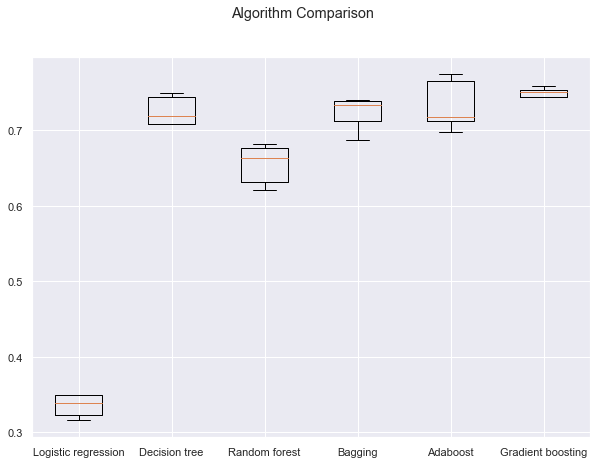

In [58]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

#### Observations
<p> Adaboost is giving the best recall scores so far, followed by gradient boosting and decision tree. Logistic regression performed the poorest of all the 6 models. The next step will be to address the imbalance in the data and see if that improves the recall scores for the 6 models. </p>

In [59]:
#Step 2: Set up oversampling - SMOTE
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 976
Before UpSampling, counts of label 'No': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 24)
After UpSampling, the shape of train_y: (10198,) 



In [60]:
#Step 2: Building the basic 6 models as outlined above, but with oversampling
# X_train_over, y_train_over are the oversampled sets
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient boosting", GradientBoostingClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 78.40755065519829
Decision tree: 93.99867228540091
Random forest: 96.23473609267063
Bagging: 95.33250591698896
Adaboost: 94.332371221305
Gradient boosting: 95.62671977525063

Training Performance:

Logistic regression: 77.3288880172583
Decision tree: 100.0
Random forest: 100.0
Bagging: 99.70582467150422
Adaboost: 94.35183369288096
Gradient boosting: 96.52873112374975


#### Observations
<p> Oversampling techniques (SMOTE) was used to address the issue of imbalanced dataset. </p>
<li> Logistic regression - The recall scores improved for logistic regression models. It is 77.3% for training, and 78.8% approximately for the set used for cross validation. This indicates that the model is fairly generalized. </li>
<li>Decision Tree - if we look at training performance, decision tree has 100% for recall scores. This indicates overfitting and most likely the model will perform less than 100% on the testing set. Since we use kfold, we can look at the cross validation scores - and decision tree has a recall of 93.9% as compared to 100% on the training set. </li>
<li> Random forest - random forest is similar to decision tree in terms of training performance (100%). On the cross validation section, it is having a recall of 96.23%. This indicates a model that is more generalized as compared to the random forest model in step 1. </li>
<li> Bagging - Bagging model had a training score of 99.7 and 95.33% on the cross validated set. The model is performing well but there is still considerable difference between training and validation sets. </li>
<li> Adaboost - Adaboost had a training score of 94.35% and 94.33% for cross validated score. This indicates that the model is generalizing well, as well as giving reasonable recall scores. </li>
<li> Gradient boosting - gradient boosting model had a performance of 96.52% for training and 95.62% on the cross validated set. This points to the model generalizing well, and good recall scores as well. </li>

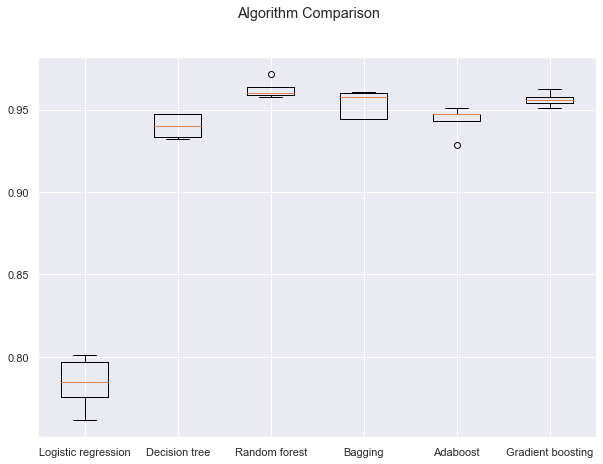

In [61]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

#### Observations
<p> With oversampling techniques, the plot shows that random forest performed the best with one outlier. The next best performing models was bagging and gradient boosting. </p>

In [62]:
# Step 3: Building the basic 6 models as outlined above, but with undersampling
# X_train_un, y_train_un are the undersampled sets
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [63]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 24)
After Under Sampling, the shape of train_y: (1952,) 



In [64]:
#Step 3: Building the basic 6 models as outlined above, but with undersampling
# X_train_un, y_train_unare the undersampled sets
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient boosting", GradientBoostingClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 73.87388801674516
Decision tree: 86.06070120355834
Random forest: 89.65201465201466
Bagging: 90.0612244897959
Adaboost: 89.34536891679748
Gradient boosting: 92.82888540031398

Training Performance:

Logistic regression: 73.66803278688525
Decision tree: 100.0
Random forest: 100.0
Bagging: 99.18032786885246
Adaboost: 91.29098360655738
Gradient boosting: 97.1311475409836


#### Observations
<p> Above dataset is with undersampling techniques. </p>
<li> Logistic regression - The recall scores dropped as compared to oversampling. It is 73.46% for training, and 73.97% approximately for the set used for cross validation. This indicates that the model is fairly generalized. </li>
<li>Decision Tree - if we look at training performance, decision tree has 100% for recall scores. This indicates overfitting and most likely the model will perform less than 100% on the testing set. Since we use kfold, we can look at the cross validation scores - and decision tree has a recall of 86.06% as compared to 100% on the training set. </li>
<li> Random forest - random forest is similar to decision tree in terms of training performance (100%). On the cross validation section, it is having a recall of 89.65%. This indicates a model that is not generalized as compared to the random forest model in step 2. </li>
<li> Bagging - Bagging model had a training score of 99.18 and 90.06% on the cross validated set. The model is performing well but there is still considerable difference between training and validation sets. </li>
<li> Adaboost - Adaboost had a training score of 91.29% and 89.34% for cross validated score. This indicates that the model is generalizing well, as well as giving reasonable recall scores (though less than oversampling models). </li>
<li> Gradient boosting - gradient boosting model had a performance of 97.13% for training and 92.82% on the cross validated set. This points to the model generalizing well, but there is considerable difference between training and validation set. </li>

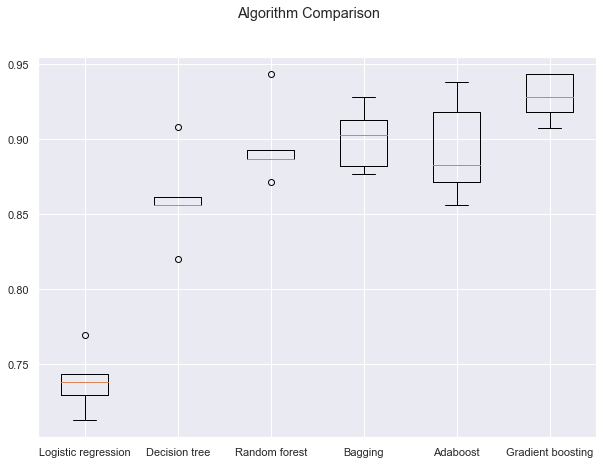

In [65]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

#### Observations
<p> We can see presence of outliers with the undersampling techniques. The best performing models were gradient boosting, adaboost and bagging. </p>

### 9. Hypertuning the best 3 models

<p> Based on the cross validation and training scores and whether the model is generalizing well - the best 3 models from above are (a) Gradient boosting with oversampling [96.52% for training and 95.62% on the cross validated set, (b) Adaboost with oversampling [training score of 94.35% and 94.33% for cross validated score],and (c) Bagging with oversampling -[training score of 99.7 and 95.33% on the cross validated set]. Random forest with oversampling was a close third, but a 100% fit on training performance indicates an overfit model. The 3 models over here will be used for GridSearch hypertuning to find the best parameters. </p>

In [66]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [67]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


#### Gradient boosting with oversampling - hypertuning with GridSearch CV

In [68]:
%%time 

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
  "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train_over, y_train_over)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'max_features': 0.9, 'n_estimators': 250, 'subsample': 0.8} 
Score: 0.9264686640112375
CPU times: user 3.59 s, sys: 233 ms, total: 3.82 s
Wall time: 51.1 s


#### Observations
<p> The hyperparameter tuning was performed for gradient boosting with oversampled data (to correct for imbalance). The n_estimators indicates the number of sequential weak learner trees that will be modeled, the default is usually 100. The subsample is the fraction of samples that will be used for fitting the individual base learners. According to the scikit learn documentation, choosing subsample of less than 1.0 leads to a reduction of variance (which may lead to increase in bias). The max_features is the number of features when looking for the best split. The time for GridSearch CV in this case was 2 min 51 seconds where it found the best parameters were 250 for number of weak learner trees, subsample of 0.8 and max_features of 0.9. </p>

In [69]:
# building gradient boosting model with oversampled data and tuned parameters
gbc_over_tuned1 = GradientBoostingClassifier(
    n_estimators=250,
    subsample=0.8,
    random_state=1,
    max_features = 0.9,
)

# Fit the model on training data
gbc_over_tuned1.fit(X_train_over, y_train_over)

GradientBoostingClassifier(max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.8)

In [70]:
# Performance metrics on the training set
gbc_grid_train_over = model_performance_classification_sklearn(
    gbc_over_tuned1, X_train_over, y_train_over
)
print("Training performance:")
gbc_grid_train_over

Training performance:


Accuracy    Recall  Precision        F1
0  0.981369  0.981173   0.981558  0.981365

#### Observations
<p> The gradient boosting model with oversampled data had a recall of 98.11% and overall F1 score of 98.13%. The accuracy was 98.13% and precision was 98.15% as well. </p>

In [71]:
# Calculating different metrics on validation set
gbc_grid_val = model_performance_classification_sklearn(gbc_over_tuned1, X_val, y_val)
print("Validation performance:")
gbc_grid_val

Validation performance:


Accuracy    Recall  Precision        F1
0  0.954097  0.889571   0.835735  0.861813

In [72]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Observations
<p> True Positive: The model predicted customer will attrite, and customer attrited. This is 2.67% for the tuned gradient boost model which is very low.  

False Positive: The model predicted that customer will attrite, and customer did not attrite. This is where predicted = 1, but observed = 0. This is 14.26% above on the validation set. 
    
True Negative: The model predicted that the customer will not attrite, and the customer did not attrite. This is where predicted = 0, and observed = 0. This is 69.64%. 

False Negative: The model predicted that the customer will not attrite, and the customer attrited. This is where predicted = 0, observed = 1. This is 13.43% in the above validation set performance. </p>

#### Gradient boosting with oversampling - hypertuning with Randomized Search CV

In [73]:
%%time 

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
  "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)


print(
    "Best Parameters:{} \nScore: {}".format(randomized_cv.best_params_, randomized_cv.best_score_)
)

Best Parameters:{'subsample': 0.9, 'n_estimators': 250, 'max_features': 0.7} 
Score: 0.8073731030873889
CPU times: user 2.13 s, sys: 74.4 ms, total: 2.2 s
Wall time: 29.4 s


In [74]:
# building gradient boosting model with oversampled data and tuned parameters via randomized Search
gbc_over_tuned2 = GradientBoostingClassifier(
    n_estimators=250,
    subsample=0.9,
    random_state=1,
    max_features = 0.7,
)

# Fit the model on training data
gbc_over_tuned2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.9)

In [75]:
# Performance metrics on the training set
gbc_random_train_over = model_performance_classification_sklearn(
    gbc_over_tuned2, X_train_over, y_train_over
)
print("Training performance:")
gbc_random_train_over

Training performance:


Accuracy    Recall  Precision        F1
0  0.980682  0.980781   0.980588  0.980684

In [76]:
# Calculating different metrics on validation set
gbc_random_val = model_performance_classification_sklearn(gbc_over_tuned2, X_val, y_val)
print("Validation performance:")
gbc_random_val

Validation performance:


Accuracy    Recall  Precision        F1
0  0.953603  0.892638   0.831429  0.860947

### Adaboost with oversampled data with hyperparameter tuning

In [77]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'learning_rate': 1, 'n_estimators': 90} 
Score: 0.8165986394557823
CPU times: user 2.3 s, sys: 220 ms, total: 2.52 s
Wall time: 41 s


In [78]:
# building model with best parameters
adb_tuned1 = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned1.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

In [79]:
# Calculating different metrics on train set
Adaboost_grid_train = model_performance_classification_sklearn(
    adb_tuned1, X_train, y_train
)
print("Training performance:")
Adaboost_grid_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.973169  0.923156   0.911021  0.917048

In [80]:
# Calculating different metrics on validation set
Adaboost_grid_val = model_performance_classification_sklearn(adb_tuned1, X_val, y_val)
print("Validation performance:")
Adaboost_grid_val

Validation performance:


Accuracy    Recall  Precision        F1
0   0.94768  0.868098   0.817919  0.842262

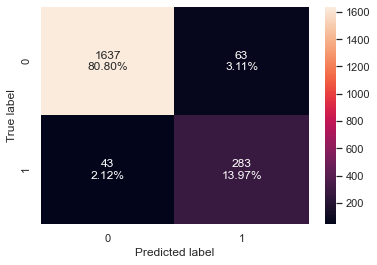

In [81]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned1, X_val, y_val)

In [82]:

%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8165986394557823:
CPU times: user 1.32 s, sys: 85.9 ms, total: 1.4 s
Wall time: 16.5 s


In [83]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

In [84]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("Training performance:")
Adaboost_random_train

Training performance:


Accuracy    Recall  Precision        F1
0  0.985021  0.944672   0.961418  0.952972

In [85]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned2, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


Accuracy    Recall  Precision        F1
0  0.960513  0.849693   0.899351  0.873817

In [86]:
%%time 

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid =  {
    "n_estimators": [10, 10, 10],
    "min_samples_leaf": np.arange(1, 6, 1),
    "max_features": [0.7, 0.9, "log2", "auto"],
    "max_samples": [0.7, 0.9, None],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'max_features': 0.7, 'max_samples': None, 'min_samples_leaf': 3, 'n_estimators': 10} 
Score: 0.7776452119309262
CPU times: user 1.5 s, sys: 142 ms, total: 1.64 s
Wall time: 11 s


In [87]:
# building model with best parameters
rf_tuned = RandomForestClassifier(
    n_estimators=10,
   
    random_state=1,
    
)

# Fit the model on training data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [88]:
# Calculating different metrics on train set
rf_grid = model_performance_classification_sklearn(
   rf_tuned, X_train, y_train
)
print("Training performance:")
rf_grid

Training performance:


Accuracy    Recall  Precision       F1
0  0.994239  0.966189   0.997884  0.98178

In [89]:
# Calculating different metrics on validation set
rf_val = model_performance_classification_sklearn(rf_tuned, X_val, y_val)
print("Validation performance:")
rf_val

Validation performance:


Accuracy    Recall  Precision        F1
0  0.939783  0.690184   0.914634  0.786713

#### Observation
<p> The best model was gradient boosting with a recall of 89% </p>

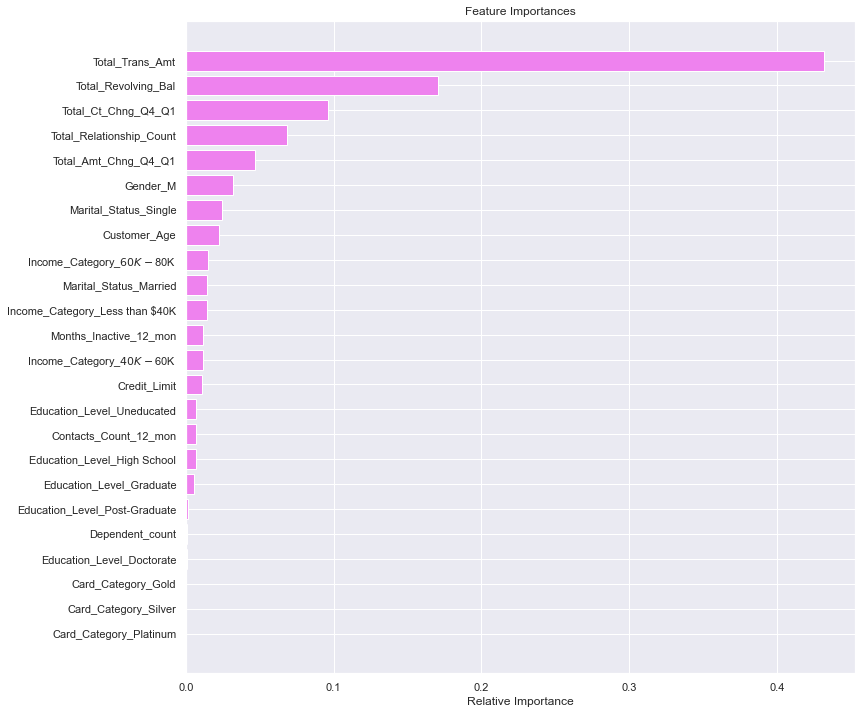

In [90]:
feature_names = X_train.columns
importances = gbc_over_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [91]:
# creating a list of numerical variables
numerical_features = ["Total_Trans_Amt", "Total_Revol_Bal", "Total_Relationship_Count","Customer_Age","Credit_Limit"]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

# creating a list of categorical variables
categorical_features = [
    "Gender_M",
    "Marital_Status",
    "Income_Category",
    "Education_Level",
   
]

# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes
# Separating target variable and other variables


In [92]:
# Separating target variable and other variables
X = customerData3.drop("Attrition_Flag", axis=1)
Y = customerData3["Attrition_Flag"]

In [93]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 15) (3039, 15)


### Insights 
<ol>
    <li> The mean customer age is 46, and 75% of the customers are 52 years or less.We can infer that the customer base for the bank products is relatively young and consists of majority of customers who are not retired from professional life. </li>
    <li> 75% of the customers have less than 2 years of relationship with the bank - this confirms the high attrition rate. </li>
    <li> 75% of the customers had a total transaction amount of about 4741 dollars in the last 12 months. The maximum was 18,484 dollars.This indicates that majority of the customers are not big spenders using a credit card. </li>
    <li> The median credit limit for females is considerably less than the median credit limit for males, while 52% of the total customers are female. </li>
    <li> There are a large number of customers (around 2500) who have 0 dollars as the amount that they carry over to the next month. These customers also comprise of attrited customers. Overall, 50% of the attrited customers have a range of 0 dollars to 1200 dollars which is less than the median carry over amount for the existing customers. This can indicate that the card services/fees/penalties for the attrited customers may have been a factor for their attrition.</li>
    <li> The attrited customers have a lower range and median of average utilization ratio as compared to existing customers. This can be interpreted that the customers not using their available credit are more likely to attrite</li>
    <li> The male customer base had more customers in the 80-120 K annunal income range while for females, the large group of customers was less than 40K per annum. </li>
    <li> Overall, the profile of the attrited customer is likely to be (a) female (b) graduate (c) holding a blue card category type product (d) making less than 40,000 dollars per annum.</li>

### Recommendations for strategies for the bank

<ol>
    <li> Since 75% of the customers are not big spenders using credit card, the bank should focus on having card services that are appropriate for smaller amounts of spending - such as reasonable annual fees and penalties. This will be a strategy to pursue also since 35% of the customers have an annual income of less than 40,000 dollars. </li>
    <li> Only 20 customers out of the 10127 customers had the card type "Platinum" indicating that this card type was not popular with the existing customer base. The customers with this card category have a credit limit of more than 30,000 dollars - hence it is crucial that these are marketed to the correct income group (i.e. higher income group).</li>
    <li> The upper credit limit for Gold, Silver, and Platinum is around 35,000 dollars. However, since 35% of the customers have an income less than 40,000 dollars per annum - one of the strategies the bank can adopt is to seek out higher income customers and offer a referral service to their existing platinum customers so as to bring in new platinum customers. </li>
    <li> Another strategy for the bank to pursue is to review their fees/penalities/services for their customers who tend to have a total revolving balance of 0 to 1800 dollars so that the attrition rate from this group can be lowered. These customers are likely to be female customers, or single customers - and the bank can advertize alert systems such that these customers become aware when their total revolving balance gets closer to 0 dollars. This will prevent customers being surprised with fees/penalties which may drive them to attrite and shop for another bank's product. A strategy such as this can help the bank lower their attrite rate and the bank can continue to generate revenue based on services.</li>
    <li> Alternatively, the bank can target married/divorced customers with higher income per annum as these customers are less likely to reach a total revolving balance of 0 dollars are thus less likely to attrite. </li>